<a href="https://colab.research.google.com/github/WBruni/Analise_Vendas_e_Desempenho_Loja/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação dos dados



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def calcular_faturamento_total(df, nome_loja):
  """
  Calcula e exibe o faturamento total da loja.

  Args:
    df: DataFrame da loja.
    nome_loja: Nome da loja para exibição no print.

  Returns:
    Faturamento total formatado.
  """
  faturamento = df['Preço'].sum()
  faturamento_em_reais = f"{faturamento:,.2f}".replace(',', 'TEMP').replace('.', ',').replace('TEMP', '.')
  print(f"O faturamento total da ({nome_loja}) é: R$ {faturamento_em_reais}")
  return faturamento

In [4]:
def analisar_vendas_por_categoria(df, nome_loja, cor):
  """
  Analisa e plota as vendas por categoria de produto.

  Args:
    df: DataFrame da loja.
    nome_loja: Nome da loja para exibição no plot.
    cor: Cor para o plot.
  """
  vendas_por_categoria = df['Categoria do Produto'].value_counts()
  vendas_por_categoria.name = 'Quantidade'
  plt.figure(figsize=(8, 8))
  plt.pie(vendas_por_categoria.values, labels=vendas_por_categoria.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette(cor, len(vendas_por_categoria)))
  plt.title(f'Vendas por Categoria - ({nome_loja})', color=cor)
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

In [5]:
def analisar_media_avaliacao(df, nome_loja):
  """
  Calcula e exibe a média de avaliação da loja.

  Args:
    df: DataFrame da loja.
    nome_loja: Nome da loja para exibição no print.

  Returns:
    Média de avaliação.
  """
  media_avaliacao = df['Avaliação da compra'].mean()
  print(f"Média de avaliação da ({nome_loja}): {media_avaliacao:.2f}")
  return media_avaliacao

In [6]:
def analisar_frete_medio(df, nome_loja):
  """
  Calcula e exibe o frete médio da loja.

  Args:
    df: DataFrame da loja.
    nome_loja: Nome da loja para exibição no print.

  Returns:
    Frete médio.
  """
  frete_medio = df['Frete'].mean()
  print(f"O frete médio da ({nome_loja}) é: R$ {frete_medio:.2f}")
  return frete_medio

In [7]:
def analisar_vendas_por_produto(df, nome_loja, cor):
  """
  Analisa e plota os produtos mais e menos vendidos.

  Args:
    df: DataFrame da loja.
    nome_loja: Nome da loja para exibição nos plots.
    cor: Cor para os plots.
  """
  vendas_por_produto = df['Produto'].value_counts()
  vendas_por_produto.name = 'Quantidade'

  produtos_mais_vendidos = vendas_por_produto.head(10)
  produtos_menos_vendidos = vendas_por_produto.tail(10)

  plt.figure(figsize=(12, 7))
  sns.barplot(x=produtos_mais_vendidos.index, y=produtos_mais_vendidos.values, palette=cor, hue=produtos_mais_vendidos.index, legend=False)
  plt.title(f'Top 10 Produtos Mais Vendidos - ({nome_loja})', color=cor)
  plt.xlabel('Produto')
  plt.ylabel('Quantidade de Vendas')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(12, 7))
  sns.barplot(x=produtos_menos_vendidos.index, y=produtos_menos_vendidos.values, palette=cor, hue=produtos_menos_vendidos.index, legend=False)
  plt.title(f'Top 10 Produtos Menos Vendidos - ({nome_loja})', color=cor)
  plt.xlabel('Produto')
  plt.ylabel('Quantidade de Vendas')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

# Análise de Vendas e Desempenho das Lojas

Compreender o desempenho individual e comparativo de nossas unidades de venda é crucial para otimizar estratégias e impulsionar o crescimento. Este notebook tem como objetivo analisar o desempenho de quatro lojas (`Loja-1`, `Loja-2`, `Loja-3` e `Loja-4`) a partir dos dados de vendas fornecidos.

Nossa análise buscará responder a perguntas chave como:

*   Qual loja gerou o maior faturamento total?
*   Existem diferenças significativas nas vendas por categoria de produto entre as lojas?
*   Qual a média de avaliação dos clientes para cada loja, e há variações regionais na satisfação?
*   Quais são os produtos mais e menos vendidos em cada unidade?
*   O frete médio varia entre as lojas, e isso pode impactar o desempenho?
*   A distribuição geográfica das vendas influencia os resultados de faturamento e avaliação?

Ao explorar estas métricas e padrões, buscamos identificar insights valiosos para entender a performance de cada loja e as possíveis influências da localização geográfica nos resultados.

# <font color='green'>**Limpeza e Análise Exploratória de Dados - (Loja-1)**</font>

Vamos iniciar nossa análise explorando os dados da `Loja-1` individualmente, antes de compará-la com as demais lojas.

In [9]:
loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


Os dados da `Loja-1` foram carregados com sucesso. As primeiras linhas apresentadas acima nos dão uma visão inicial da estrutura do dataset, incluindo colunas como `Produto`, `Preço`, `Data da Compra` e informações geográficas. Nosso próximo passo será remover a coluna `Vendedor`, pois ela não é relevante para os objetivos desta análise.

In [10]:
def limpar_dados_loja(df):
  """
  Realiza a limpeza inicial do DataFrame da loja.

  Args:
    df: DataFrame da loja.

  Returns:
    DataFrame limpo.
  """
  df = df.drop(['Vendedor'], axis=1)
  df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], format='%d/%m/%Y')
  return df

In [11]:
loja1 = limpar_dados_loja(loja1) # Coluna Vendedor Retirada e Data Convertida
loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,MG,5,boleto,1,-18.10,-44.38


**Observação:** A coluna `Vendedor` foi retirada das análises, pois não apresenta relevância direta para os insights que buscamos sobre o desempenho geral da loja.
A coluna `Data da Compra` foi convertida com sucesso para o tipo datetime, o que permitirá análises temporais mais precisas.

In [12]:
print(loja1.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Local da compra', 'Avaliação da compra', 'Tipo de pagamento',
       'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


Acima, a lista de colunas do DataFrame `Loja-1` para confirmar que a coluna `Vendedor` foi removida com sucesso.

## <font color='green'>. Verificação de Qualidade dos Dados - (Loja-1)</font>

Vamos verificar se há dados ausentes (valores nulos), tipos de dados incorretos ou valores duplicados em cada coluna. Isso é importante porque dados incompletos, incorretos ou duplicados podem distorcer nossas análises de faturamento, avaliação, etc., levando a conclusões imprecisas.

In [13]:
def verificar_dados_loja(df, nome_loja):
  """
  Verifica valores ausentes, tipos de dados e valores duplicados no DataFrame.

  Args:
    df: DataFrame da loja.
    nome_loja: Nome da loja para exibição nos prints.
  """
  print(f"--- Verificação de Dados - ({nome_loja}) ---")
  print("\nValores Ausentes:")
  display(df.isnull().sum())

  print("\nInformações sobre os Tipos de Dados:")
  display(df.info())

  print("\nValores Duplicados:")
  display(df.duplicated().sum())

In [148]:
verificar_dados_loja(loja1, 'Loja-1')

--- Verificação de Dados - (Loja-1) ---

Valores Ausentes:


,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0
lat,0



Informações sobre os Tipos de Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Produto                 2359 non-null   object        
 1   Categoria do Produto    2359 non-null   object        
 2   Preço                   2359 non-null   float64       
 3   Frete                   2359 non-null   float64       
 4   Data da Compra          2359 non-null   datetime64[ns]
 5   Local da compra         2359 non-null   object        
 6   Avaliação da compra     2359 non-null   int64         
 7   Tipo de pagamento       2359 non-null   object        
 8   Quantidade de parcelas  2359 non-null   int64         
 9   lat                     2359 non-null   float64       
 10  lon                     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 20

None


Valores Duplicados:


np.int64(0)

A saída da célula acima mostra os resultados da verificação de qualidade dos dados para a `Loja-1`. Observamos que:

*   Não há valores ausentes em nenhuma coluna.
*   Os tipos de dados parecem apropriados para cada coluna (por exemplo, `datetime64[ns]` para a 'Data da Compra', `float64` para 'Preço' e 'Frete', `int64` para 'Avaliação da compra' e 'Quantidade de parcelas', e `object` para colunas categóricas como 'Produto' e 'Categoria do Produto').
*   Não foram encontrados valores duplicados.

Esses resultados indicam que o DataFrame da `Loja-1` está limpo e pronto para as próximas etapas de análise.

## <font color='green'>. Consistência em Colunas Categóricas - (Loja-1)</font>

Vamos verificar os valores únicos em colunas categóricas como `Produto`, `Categoria do Produto`, `Local da compra` e `Tipo de pagamento`. Isso nos ajuda a identificar possíveis inconsistências de digitação ou variações que precisem ser padronizadas para análises precisas.

In [149]:
def verificar_consistencia_categoricas(df, colunas_categoricas, nome_loja):
  """
  Verifica e exibe os valores únicos em colunas categóricas.

  Args:
    df: DataFrame da loja.
    colunas_categoricas: Lista de nomes das colunas categóricas a serem verificadas.
    nome_loja: Nome da loja para exibição nos prints.
  """
  print(f"\n--- Verificação de Consistência em Colunas Categóricas - ({nome_loja}) ---")
  for coluna in colunas_categoricas:
    print(f"\nValores únicos na coluna '{coluna}':")
    display(df[coluna].unique())

In [150]:
colunas_categoricas = ['Produto', 'Categoria do Produto', 'Local da compra', 'Tipo de pagamento']
verificar_consistencia_categoricas(loja1, colunas_categoricas, 'Loja-1')


--- Verificação de Consistência em Colunas Categóricas - (Loja-1) ---

Valores únicos na coluna 'Produto':


array(['Assistente virtual', 'Mesa de jantar', 'Jogo de tabuleiro',
       'Micro-ondas', 'Cadeira de escritório', 'Blocos de montar',
       'Boneca bebê', 'Lava louças', 'Lavadora de roupas',
       'Carrinho controle remoto', 'Geladeira', 'Fone de ouvido',
       'Panela de pressão', 'Bicicleta', 'Ciência de dados com python',
       'Bola de vôlei', 'Xadrez de madeira', 'TV Led UHD 4K',
       'Copo térmico', 'Kit banquetas', 'Dashboards com Power BI',
       'Faqueiro', 'Jogo de panelas', 'Bateria', 'Corda de pular',
       'Fogão', 'Cama box', 'Impressora', 'Cômoda', 'Guarda roupas',
       'Dinossauro Rex', 'Guitarra', 'Secadora de roupas',
       'Sofá retrátil', 'Tablet ABXY', 'Cubo mágico 8x8', 'Jogo de copos',
       'Modelagem preditiva', 'Celular Plus X42', 'Mochila',
       'Bola de basquete', 'Headset', 'Poltrona', 'Violão',
       'Iniciando em programação', 'Celular ABXY', 'Smartwatch',
       'Mesa de centro', 'Cama king', 'Smart TV', 'Pandeiro'],
      dtype=object)


Valores únicos na coluna 'Categoria do Produto':


array(['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos',
       'utilidades domesticas', 'esporte e lazer', 'livros',
       'instrumentos musicais'], dtype=object)


Valores únicos na coluna 'Local da compra':


array(['SP', 'RJ', 'DF', 'RS', 'MG', 'CE', 'ES', 'BA', 'TO', 'PR', 'AP',
       'GO', 'AL', 'PI', 'PE', 'AM', 'RN', 'PA', 'PB', 'SC', 'SE', 'MT',
       'MS', 'RO', 'MA', 'AC'], dtype=object)


Valores únicos na coluna 'Tipo de pagamento':


array(['cartao_credito', 'boleto', 'cupom', 'cartao_debito'], dtype=object)

**Observação:** A verificação dos valores únicos nas colunas categóricas `Produto`, `Categoria do Produto`, `Local da compra`, `Tipo de pagamento` na `Loja-1` não encontrou inconsistências ou erros que precisem de correção para esta análise.

## <font color='green'>. Valores Atípicos ou Valores Irreais - (Loja-1)</font>

Analisaremos as estatísticas descritivas e gráficos (box plots) para identificar valores de `Preço`, `Frete` ou `Quantidade de parcelas` que pareçam muito fora do comum (muito altos ou muito baixos). Valores irrealistas podem indicar erros de entrada de dados que precisam ser investigados, embora nem sempre representem erros, podendo ser apenas casos extremos.

In [ ]:
def analisar_metricas_numericas(df, nome_loja):
  """
  Analisa estatísticas descritivas e valores atípicos em colunas numéricas.

  Args:
    df: DataFrame da loja.
    nome_loja: Nome da loja para exibição nos plots.
  """
  colunas_numericas = ['Preço', 'Frete', 'Avaliação da compra', 'Quantidade de parcelas']
  print(f"\n--- Análise de Métricas Numéricas - ({nome_loja}) ---")
  display(df[colunas_numericas].describe())

  # Box plots
  plt.figure(figsize=(15, 5))
  for i, coluna in enumerate(['Preço', 'Frete', 'Quantidade de parcelas']):
      plt.subplot(1, 3, i + 1)
      plt.boxplot(df[coluna])
      plt.title(f'Box Plot - {coluna} - ({nome_loja})')
      plt.ylabel(coluna)
      plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()


--- Análise de Métricas Numéricas - (Loja-1) ---


,Preço,Frete,Avaliação da compra,Quantidade de parcelas
count,2359.000000,2359.000000,2359.000000,2359.000000
mean,650.491361,34.691805,3.976685,2.943196
std,819.582778,43.814183,1.415370,2.819897
min,10.070000,0.000000,1.000000,1.000000
25%,74.345000,4.141783,3.000000,1.000000
50%,313.750000,16.498835,5.000000,1.000000
75%,904.130000,48.050074,5.000000,4.000000
max,3969.380000,214.377060,5.000000,24.000000


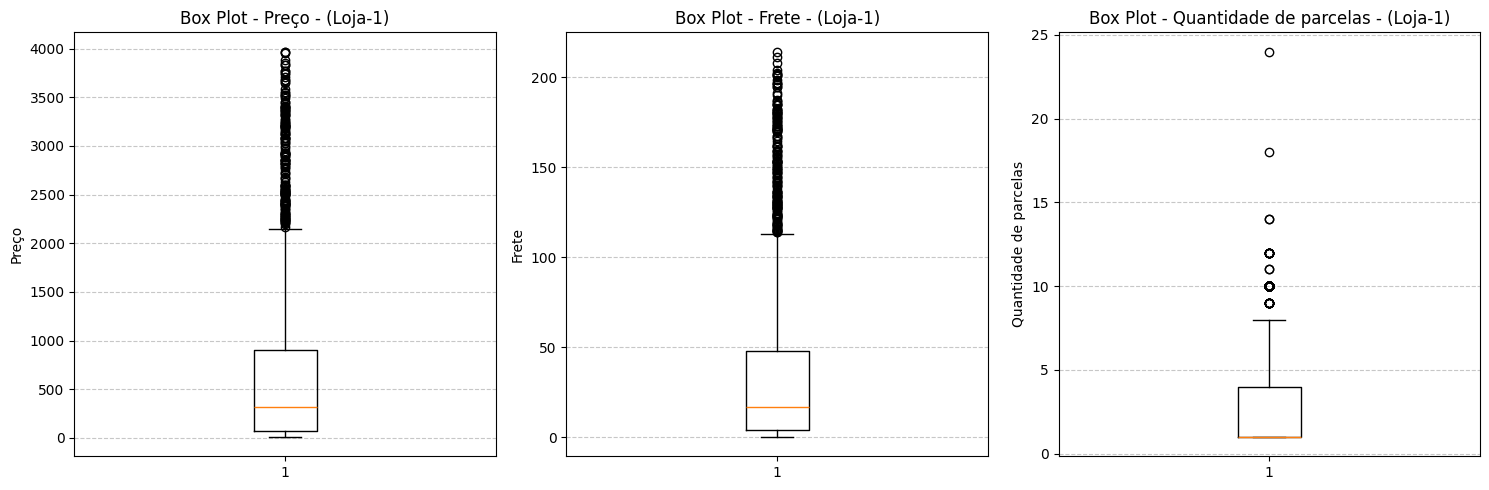

In [151]:
analisar_metricas_numericas(loja1, 'Loja-1')

**Observação:** Com base nos box plots acima, que nos ajudam a visualizar a distribuição dos dados, a mediana e a presença de possíveis valores atípicos para as colunas numéricas (`Preço`, `Frete` e `Quantidade de parcelas`) da `Loja-1`, observamos que a maioria dos dados se concentra dentro das "caixas". Os pontos individuais fora das "caixas" indicam valores atípicos.

*   No `Preço`, há vários valores atípicos indicando vendas de produtos com preços consideravelmente mais altos que a maioria.
*   No `Frete`, também notamos a presença de valores atípicos elevados, sugerindo custos de frete significativamente maiores em algumas vendas.
*   Na `Quantidade de parcelas`, os valores atípicos parecem menos numerosos em comparação com `Preço` e `Frete`, mas ainda indicam algumas vendas com um número de parcelas incomum.

## <font color='green'>. Verificação de Valores Geográficos (Lat/Lon) - (Loja-1)</font>

Verificando os valores das colunas `lat` e `lon` para identificar possíveis dados irrealistas ou erros de entrada que possam estar fora da área geográfica esperada para as vendas.

In [152]:
import matplotlib.pyplot as plt

def analisar_dados_geograficos(df, nome_loja, cor):
  """
  Verifica valores geográficos e plota a distribuição das vendas.

  Args:
    df: DataFrame da loja.
    nome_loja: Nome da loja para exibição nos prints e plots.
    cor: Cor para o plot.
  """
  print(f"\n--- Análise de Dados Geográficos - ({nome_loja}) ---")
  print("Valores mínimos e máximos para Lat e Lon:")
  print(f"Latitude Mínima: {df['lat'].min()}, Latitude Máxima: {df['lat'].max()}")
  print(f"Longitude Mínima: {df['lon'].min()}, Longitude Máxima: {df['lon'].max()}")

  plt.figure(figsize=(10, 8))
  plt.scatter(df['lon'], df['lat'], alpha=0.5, s=10, color=cor)
  plt.title(f'Distribuição Geográfica das Vendas - ({nome_loja})', color=cor)
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.grid(True)
  plt.show()


--- Análise de Dados Geográficos - (Loja-1) ---
Valores mínimos e máximos para Lat e Lon:
Latitude Mínima: -30.17, Latitude Máxima: 1.41
Longitude Mínima: -70.55, Longitude Máxima: -36.59


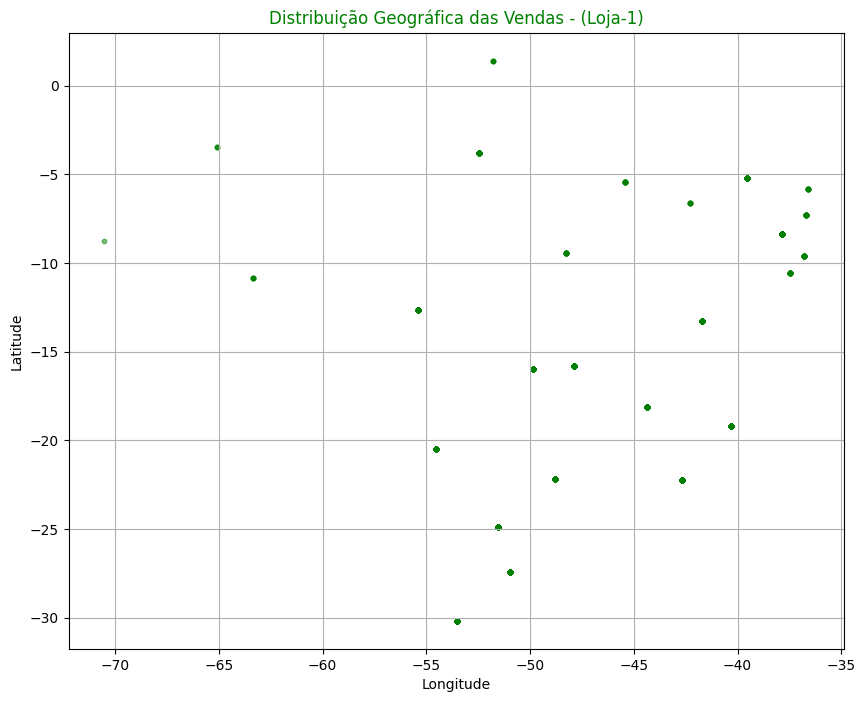

In [153]:
analisar_dados_geograficos(loja1, 'Loja-1', 'green')

**Observação:** Os valores mínimos e máximos de Latitude e Longitude para a `Loja-1` parecem estar dentro da faixa geográfica esperada para o Brasil, o que é um bom sinal de que os dados de localização são válidos para análise.

## <font color='green'>. Registros com Frete Zero - (Loja-1)</font>

Vamos analisar os registros de vendas onde o valor do frete é zero para identificar padrões em categorias de `Produto`, `Locail de Compra` e `Tipo de pagamento` associados a frete grátis ou promocional.

In [27]:
frete_zero_loja1 = loja1[loja1['Frete'] == 0]
display(frete_zero_loja1)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
5,Blocos de montar,brinquedos,32.26,0.0,2020-12-03,RS,5,cupom,1,-30.17,-53.50
6,Boneca bebê,brinquedos,58.90,0.0,2021-08-07,SP,3,boleto,1,-22.19,-48.79
24,Dashboards com Power BI,livros,44.69,0.0,2023-02-14,MG,5,cartao_credito,2,-18.10,-44.38
54,Cubo mágico 8x8,brinquedos,22.86,0.0,2021-09-03,RJ,4,boleto,1,-22.25,-42.66
60,Corda de pular,esporte e lazer,17.11,0.0,2021-09-25,AL,3,cartao_credito,5,-9.62,-36.82
...,...,...,...,...,...,...,...,...,...,...,...
2339,Headset,eletronicos,63.95,0.0,2022-03-24,SP,5,cartao_credito,5,-22.19,-48.79
2341,Jogo de copos,utilidades domesticas,43.49,0.0,2020-05-28,SP,1,cartao_credito,1,-22.19,-48.79
2348,Copo térmico,esporte e lazer,37.76,0.0,2020-03-25,SP,5,cartao_credito,1,-22.19,-48.79
2349,Faqueiro,utilidades domesticas,47.63,0.0,2020-06-29,MG,4,boleto,1,-18.10,-44.38


Acima, apresentamos os registros do DataFrame da `Loja-1` onde o valor do frete é zero. Agora, vamos analisar esses registros para identificar padrões em categorias de `Produto`, `Local da Compra` e `Tipo de pagamento`.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def frete_zero_por_categoria(df, nome_loja, palette_name):
  """
  Plota o gráfico de frete zero por categoria de produto.

  Args:
    df: DataFrame da loja.
    nome_loja: Nome da loja para exibição no plot.
    palette_name: Nome da paleta de cores do seaborn ou lista de cores.
  """
  frete_zero = df[df['Frete'] == 0]

  if frete_zero.empty:
    print(f"Não há registros com frete zero na ({nome_loja}).")
    return

  frete_por_categoria = frete_zero['Categoria do Produto'].value_counts()
  frete_por_categoria.name = 'Quantidade'

  plt.figure(figsize=(8, 8))
  plt.pie(frete_por_categoria.values, labels=frete_por_categoria.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette(palette_name, len(frete_por_categoria)))
  plt.title(f'Frete Zero por Categoria de Produto - ({nome_loja})', color='black')
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

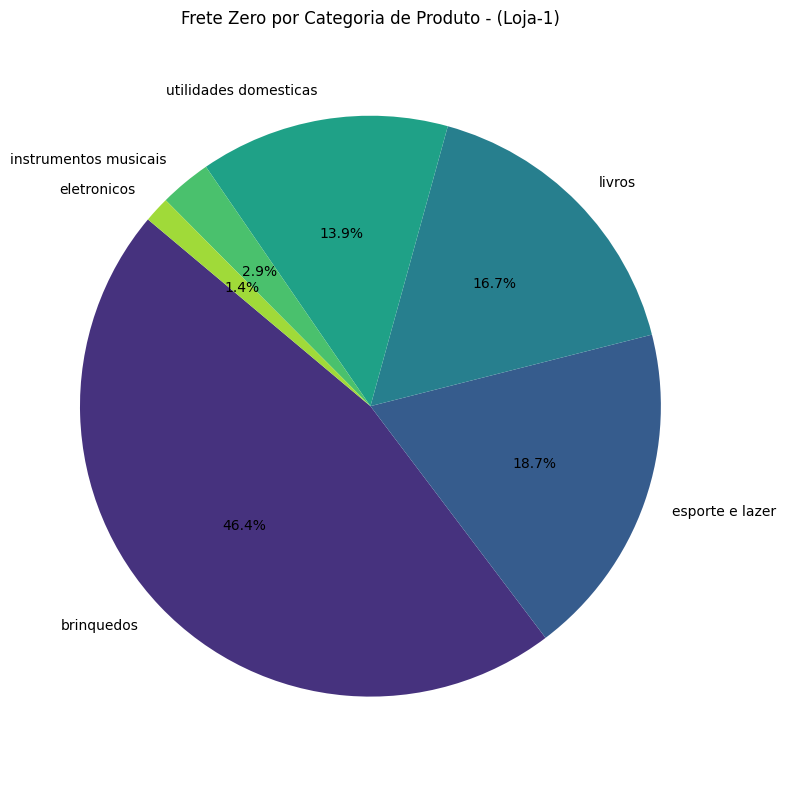

In [179]:
frete_zero_por_categoria(loja1, 'Loja-1', 'viridis')

O gráfico mostra a distribuição percentual dos registros com frete zero por categoria de produto na `Loja-1`. Ele nos permite visualizar quais categorias de produtos têm a maior proporção de vendas com frete grátis ou promocional.

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

def frete_zero_por_local(df, nome_loja, palette_name):
  """
  Plota o gráfico de frete zero por local da compra com cores variadas.

  Args:
    df: DataFrame da loja.
    nome_loja: Nome da loja para exibição no plot.
    palette_name: Nome da paleta de cores do seaborn ou lista de cores.
  """
  frete_zero = df[df['Frete'] == 0]

  if frete_zero.empty:
    print(f"Não há registros com frete zero na ({nome_loja}).")
    return

  locais_com_frete_zero = frete_zero['Local da compra'].value_counts()
  locais_com_frete_zero.name = 'Quantidade'

  plt.figure(figsize=(12, 6))
  # Usa o nome da paleta ou lista de cores fornecida
  sns.barplot(x=locais_com_frete_zero.index, y=locais_com_frete_zero.values, palette=palette_name, hue=locais_com_frete_zero.index, legend=False)
  plt.title(f'Frete Zero por Local da Compra - ({nome_loja})', color='black') # Título preto para ser visível com qualquer paleta
  plt.xlabel('Local da Compra')
  plt.ylabel('Quantidade de Registros com Frete Zero')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

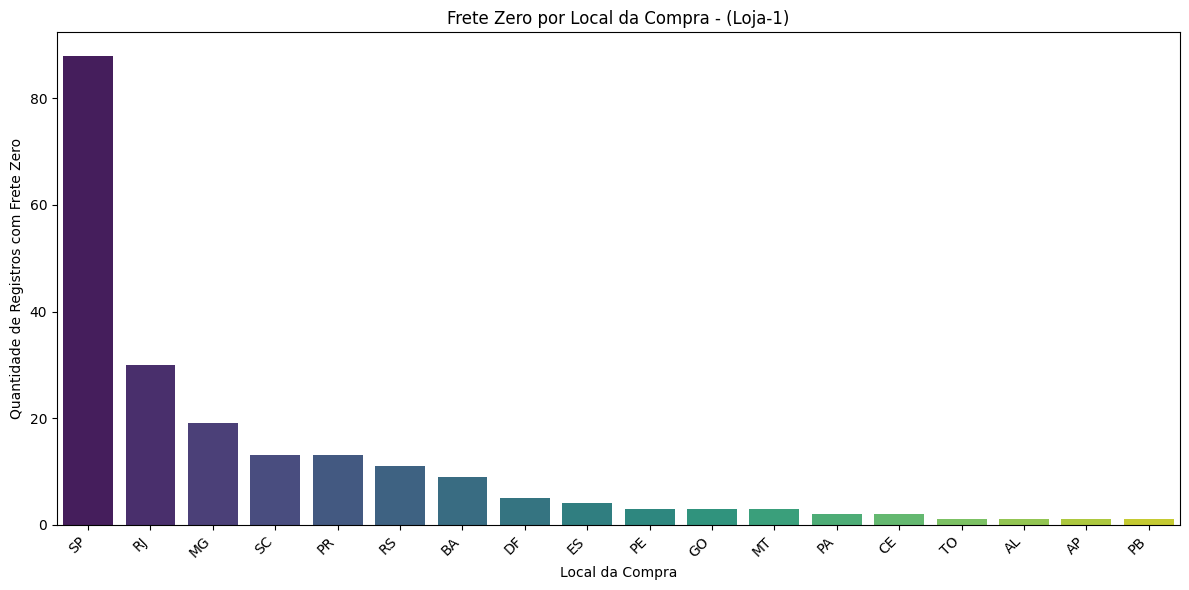

In [176]:
frete_zero_por_local(loja1, 'Loja-1', 'viridis')

O gráfico mostra a quantidade de registros com frete zero por local da compra na `Loja-1`. Ele nos permite identificar em quais estados ou regiões o frete zero é mais frequente.

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

def frete_zero_por_pagamento(df, nome_loja, palette_name):
  """
  Plota o gráfico de frete zero por tipo de pagamento.

  Args:
    df: DataFrame da loja.
    nome_loja: Nome da loja para exibição no plot.
    palette_name: Nome da paleta de cores do seaborn ou lista de cores.
  """
  frete_zero = df[df['Frete'] == 0]

  if frete_zero.empty:
    print(f"Não há registros com frete zero na ({nome_loja}).")
    return

  tipos_pagamento_com_frete_zero = frete_zero['Tipo de pagamento'].value_counts()
  tipos_pagamento_com_frete_zero.name = 'Quantidade'

  plt.figure(figsize=(8, 8))
  plt.pie(tipos_pagamento_com_frete_zero.values, labels=tipos_pagamento_com_frete_zero.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette(palette_name, len(tipos_pagamento_com_frete_zero)))
  plt.title(f'Frete Zero por Tipo de Pagamento - ({nome_loja})', color='black')
  plt.axis('equal') # Garante que o gráfico de pizza seja um círculo.
  plt.tight_layout()
  plt.show()

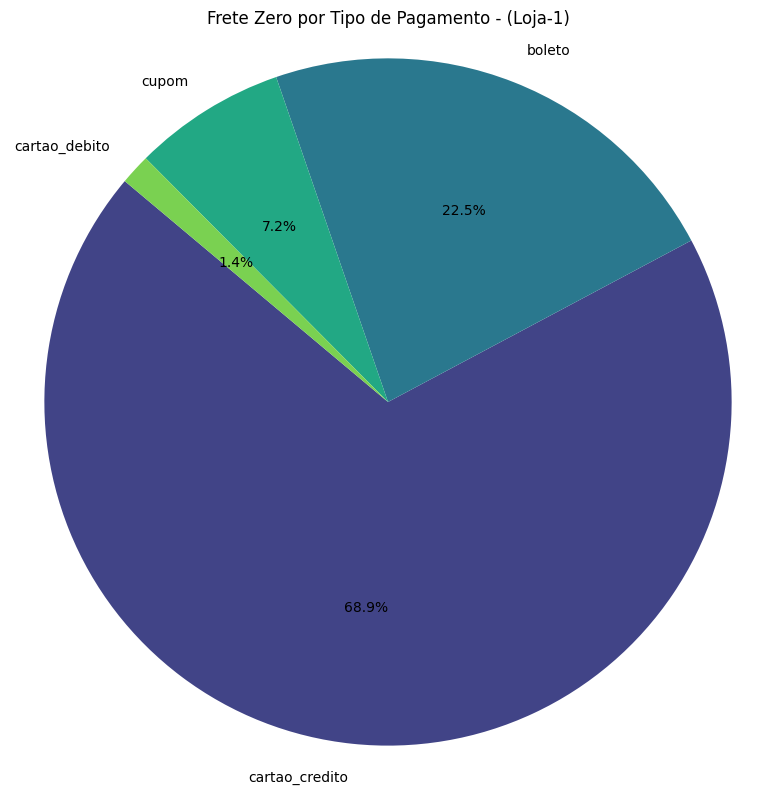

In [177]:
frete_zero_por_pagamento(loja1, 'Loja-1', 'viridis')

O gráfico mostra a distribuição percentual dos registros com frete zero por tipo de pagamento na `Loja-1`. Ele nos permite visualizar quais tipos de pagamento são mais associados a vendas com frete grátis ou promocional.

## <font color='green'>. Descobertas sobre Registros com Frete Zero - (Loja-1)</font>

Com base na análise e nos gráficos dos registros onde o `Frete` foi zero na `Loja-1`, observamos o seguinte:

*   Os gráficos mostram que as categorias de produtos com maior número de registros de frete zero são **Brinquedos**, **Esporte e Lazer**, e **Livros**.
*   A distribuição geográfica nos gráficos indica que os locais de compra com mais registros de frete zero são **SP**, **RJ**, e **MG**.
*   Em relação aos tipos de pagamento, o gráfico revela que o tipo mais frequente nesses registros é **Cartão de crédito**, seguido por **Boleto**.

Essas observações, visualizadas nos gráficos, sugerem que o `Frete` zero na `Loja-1` pode estar mais relacionado a certas categorias de produtos, concentrado em alguns estados e frequentemente utilizado em pagamentos com cartão de crédito, **indicando possíveis promoções ou estratégias de venda focadas nesses itens ou regiões.**

## <font color='green'>**1. Análise de Faturamento Total - (Loja-1)**</font>

Esta seção apresenta o cálculo do faturamento total da `Loja-1`, somando os preços de todas as vendas registradas.

In [34]:
faturamento_loja1 = loja1['Preço'].sum()

faturamento_em_reais = f"{faturamento_loja1:,.2f}"

faturamento_em_reais = faturamento_em_reais.replace(',', 'TEMP').replace('.', ',').replace('TEMP', '.')

print(f"O faturamento total da (Loja-1) é: R$ {faturamento_em_reais}")

O faturamento total da (Loja-1) é: R$ 1.534.509,12


O faturamento total da `Loja-1`, calculado pela soma dos preços de todas as vendas registradas, é de R$ 1.534.509,12. Este valor representa o total de receita bruta gerada pela `Loja-1` no período analisado.

### <font color='green'>**. Análise de Faturamento por Estado - (Loja-1)**</font>

In [35]:
faturamento_estado_loja1 = loja1.groupby('Local da compra')['Preço'].sum().reset_index()
faturamento_estado_loja1.rename(columns={'Preço': 'Faturamento (Loja-1)'}, inplace=True)

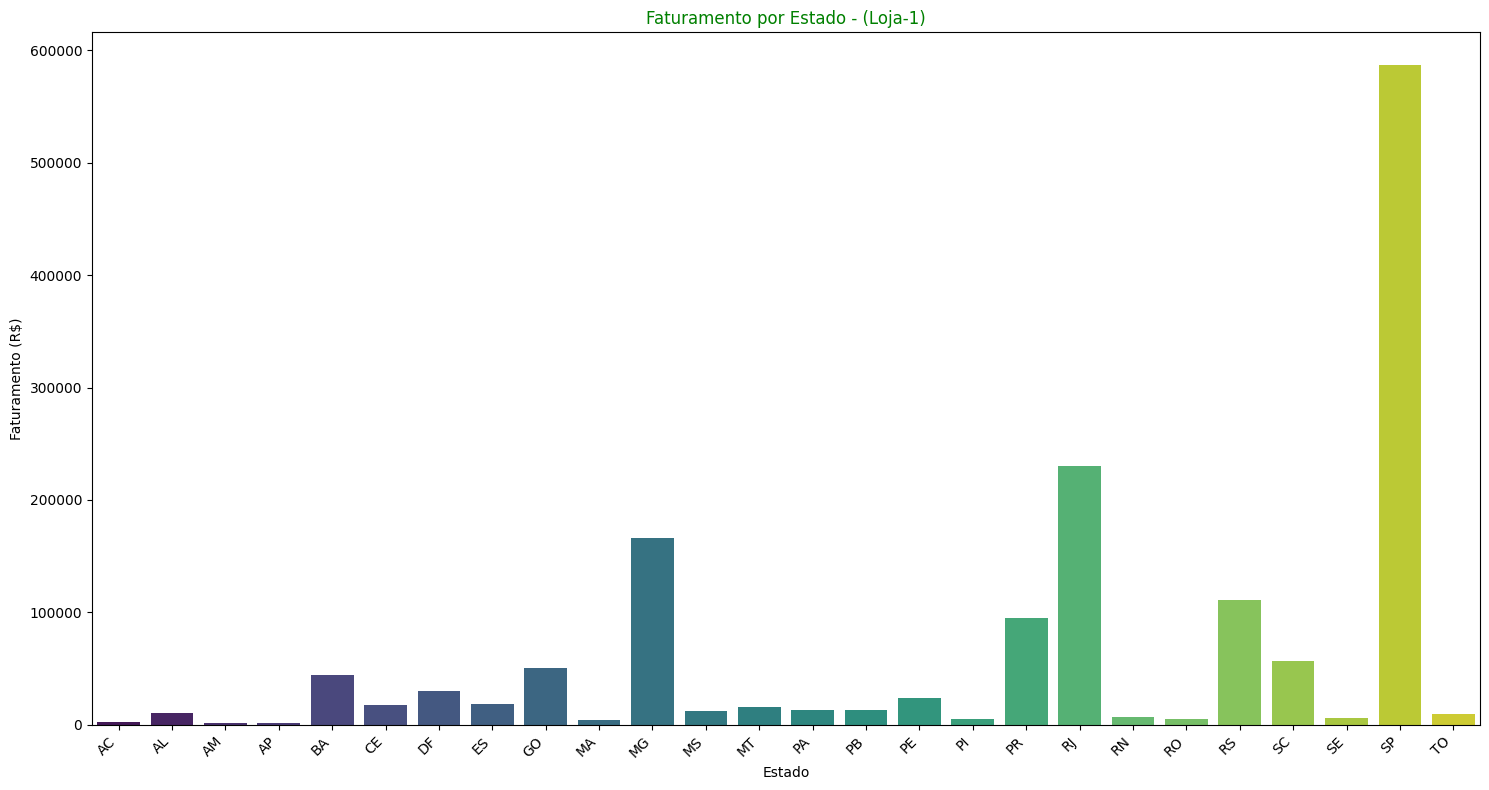

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x='Local da compra', y='Faturamento (Loja-1)', data=faturamento_estado_loja1, palette='viridis', hue='Local da compra', legend=False)
plt.title('Faturamento por Estado - (Loja-1)', color='green')
plt.xlabel('Estado')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

O gráfico mostra o faturamento total da `Loja-1` por estado.

## <font color='green'>**2. Vendas por Categoria - (Loja-1)**</font>

Esta seção apresenta a contagem de vendas por categoria de produto na `Loja-1`.

In [37]:
vendas_por_categoria_loja1 = loja1['Categoria do Produto'].value_counts()
vendas_por_categoria_loja1.name = 'Quantidade'

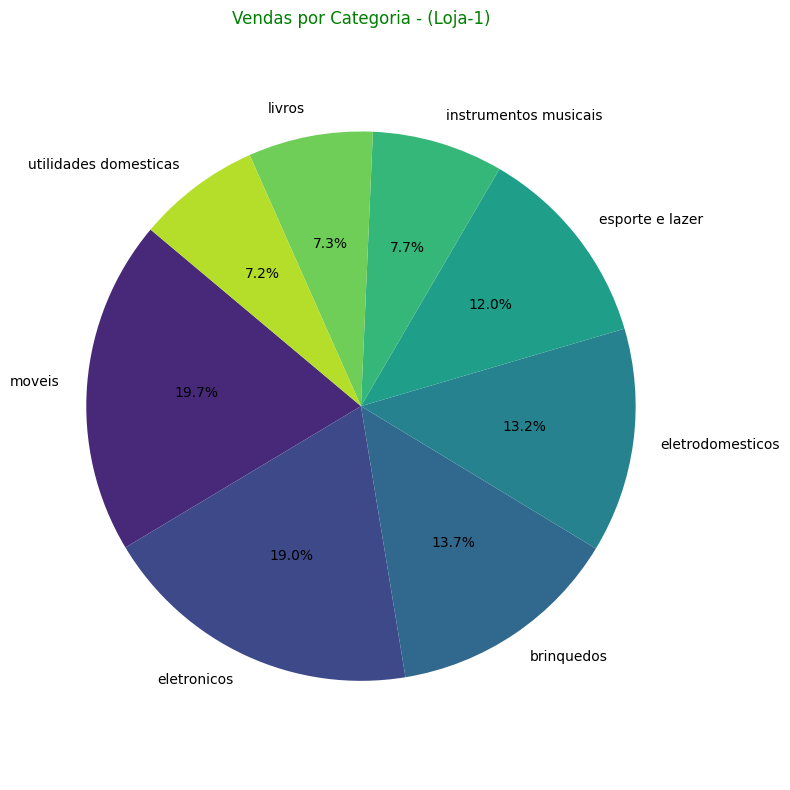

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
plt.pie(vendas_por_categoria_loja1.values, labels=vendas_por_categoria_loja1.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(vendas_por_categoria_loja1)))
plt.title('Vendas por Categoria - (Loja-1)', color='green')
plt.axis('equal') # Garante que o gráfico de pizza seja um círculo.
plt.tight_layout()
plt.show()

O gráfico mostra a distribuição percentual das vendas por categoria de produto na `Loja-1`.

## <font color='green'>**3. Média de Avaliação por Loja - (Loja-1)**</font>

Esta seção apresenta o cálculo da média de avaliação dos clientes para a `Loja-1`.

In [39]:
media_avaliacao_loja1 = loja1['Avaliação da compra'].mean()

print(f"Média de avaliação da (Loja-1): {media_avaliacao_loja1:.2f}")

Média de avaliação da (Loja-1): 3.98


### <font color='green'>. Média de Avaliação por Estado - (Loja-1)</font>

In [40]:
media_avaliacao_estado_loja1 = loja1.groupby('Local da compra')['Avaliação da compra'].mean().reset_index()
media_avaliacao_estado_loja1.rename(columns={'Avaliação da compra': 'Média Avaliação (Loja-1)'}, inplace=True)

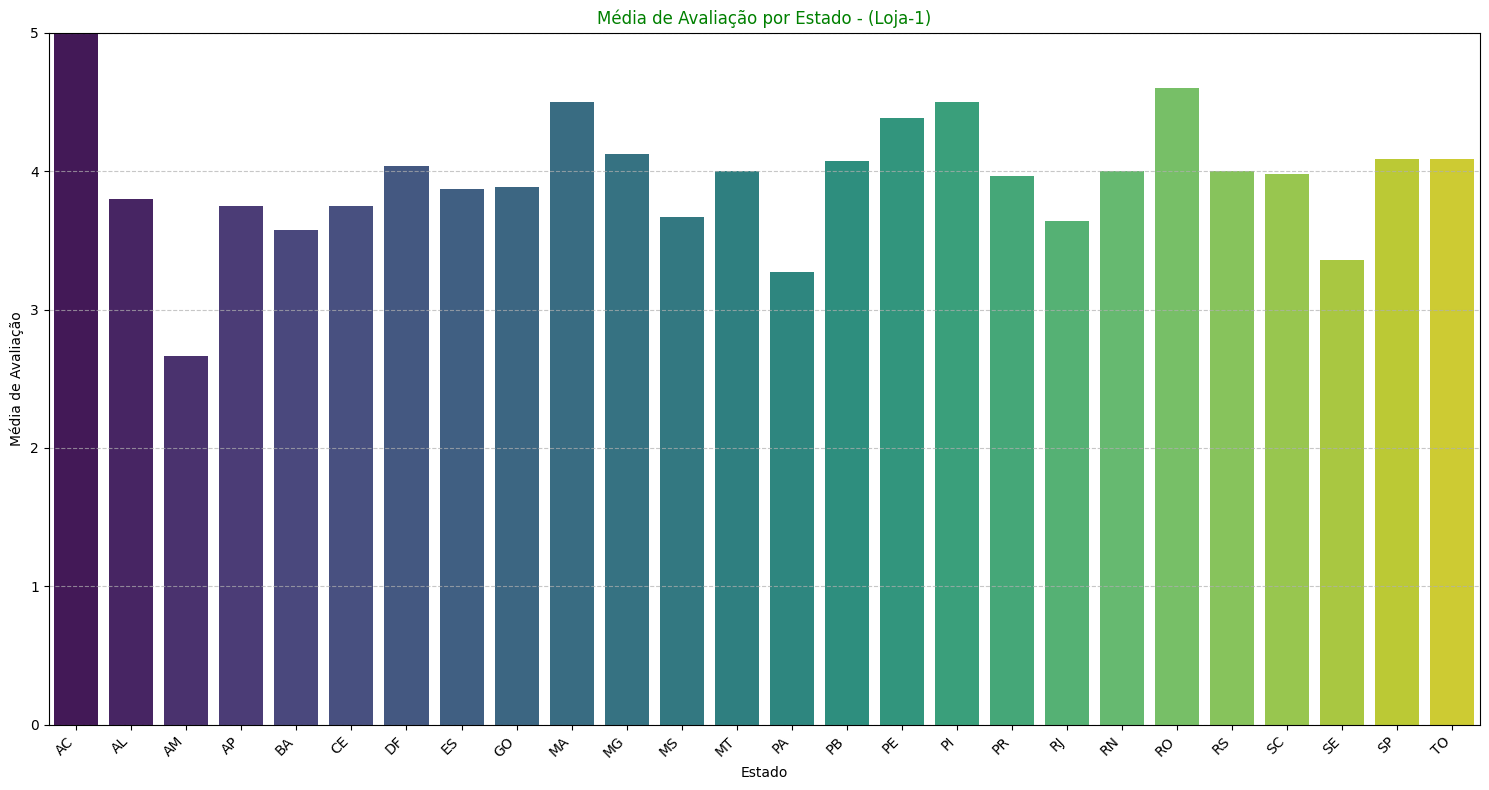

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x='Local da compra', y='Média Avaliação (Loja-1)', data=media_avaliacao_estado_loja1, palette='viridis', hue='Local da compra', legend=False)
plt.title('Média de Avaliação por Estado - (Loja-1)', color='green')
plt.xlabel('Estado')
plt.ylabel('Média de Avaliação')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5) # Define o limite do eixo Y de 0 a 5, que é a escala da avaliação.
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

O gráfico mostra a média de avaliação dos clientes para a `Loja-1` por estado.

## <font color='green'>**4. Produtos Mais e Menos Vendidos - (Loja-1)**</font>

Esta seção apresenta os produtos mais e menos vendidos da `Loja-1`.

In [42]:
vendas_por_produto_loja1 = loja1['Produto'].value_counts()
vendas_por_produto_loja1.name = 'Quantidade'

### <font color='green'>.Top 10 Produtos Mais Vendidos - (Loja-1)</font>

In [43]:
produtos_mais_vendidos_loja1 = vendas_por_produto_loja1.head(10)

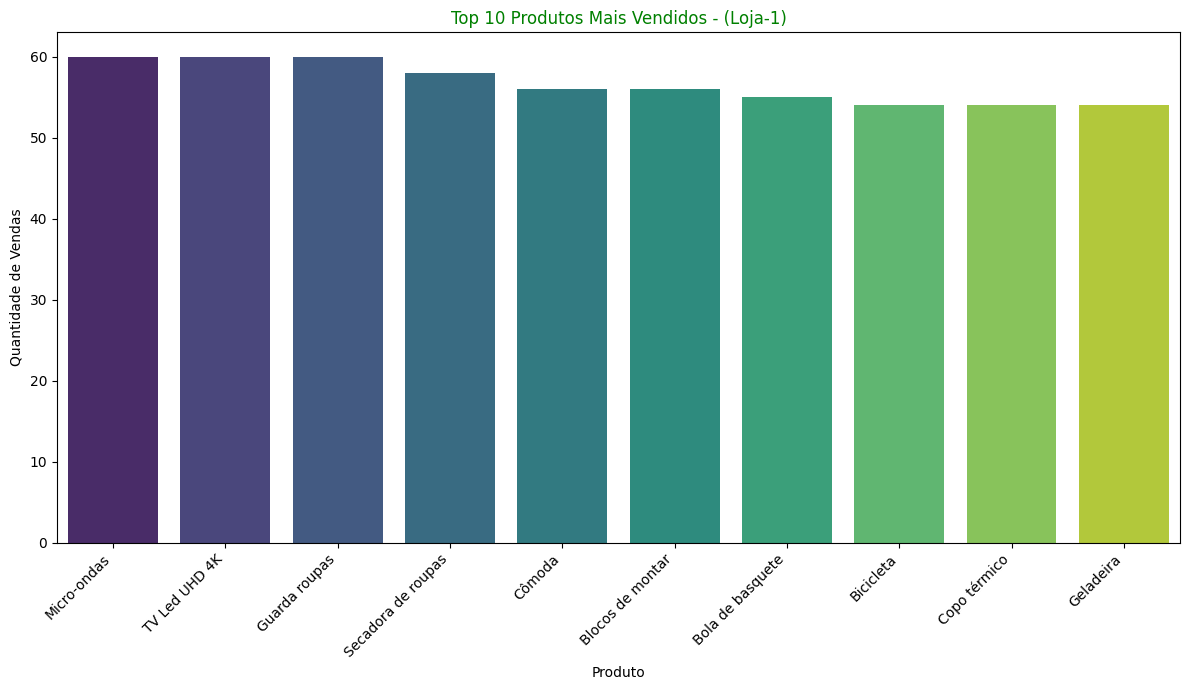

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x=produtos_mais_vendidos_loja1.index, y=produtos_mais_vendidos_loja1.values, palette='viridis', hue=produtos_mais_vendidos_loja1.index, legend=False)
plt.title('Top 10 Produtos Mais Vendidos - (Loja-1)', color='green')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observação:** O gráfico acima exibe os 10 produtos mais vendidos na `Loja-1`. É possível identificar visualmente quais produtos tiveram o maior volume de vendas nesta loja.

### <font color='green'>.Top 10 Produtos Menos Vendidos - (Loja-1)</font>

In [45]:
produtos_menos_vendidos_loja1 = vendas_por_produto_loja1.tail(10)

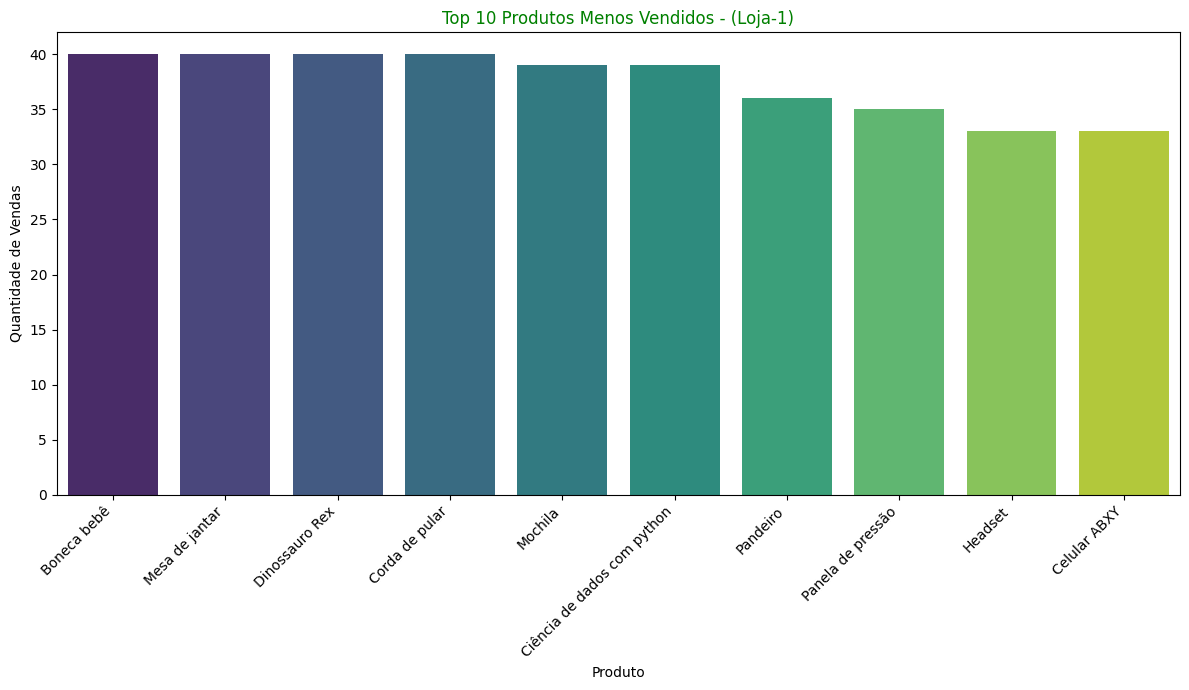

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x=produtos_menos_vendidos_loja1.index, y=produtos_menos_vendidos_loja1.values, palette='viridis', hue=produtos_menos_vendidos_loja1.index, legend=False)
plt.title('Top 10 Produtos Menos Vendidos - (Loja-1)', color='green')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observação:** O gráfico acima exibe os 10 produtos menos vendidos na `Loja-1`. É possível identificar visualmente quais produtos tiveram o menor volume de vendas nesta loja.

## <font color='green'>**5. Frete Médio por Loja - (Loja-1)**</font>

Esta seção apresenta o cálculo da média dos fretes para a `Loja-1`.

In [47]:
frete_medio_loja1 = loja1['Frete'].mean()

print(f"O frete médio da (Loja-1) é: R$ {frete_medio_loja1:.2f}")

O frete médio da (Loja-1) é: R$ 34.69


## <font color='green'>Conclusões da Análise da (Loja-1): Integrando Insights de Desempenho e Geográficos</font>

A `Loja-1` se destaca pelo maior faturamento total, impulsionado principalmente pelas vendas concentradas na região Sudeste, especialmente em São Paulo e Rio de Janeiro. A loja mantém uma boa média de avaliação geral dos clientes. As categorias de produtos mais vendidas são móveis e eletrônicos, e a análise de frete zero sugere estratégias promocionais em categorias como brinquedos e em locais do Sudeste. A combinação de uma forte presença no Sudeste, portfólio popular e frete estratégico parece contribuir para o seu desempenho superior.

# <font color='magenta'>**Análise de Dados - (Loja-2)**</font>

In [48]:
loja2.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66
2,Cama king,moveis,591.13,31.759020,22/10/2021,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95
3,Cama king,moveis,1208.24,61.919584,04/05/2022,Larissa Alves,RS,5,cartao_credito,10,-30.17,-53.50
4,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,Lucas Oliveira,SP,4,cartao_credito,3,-22.19,-48.79


In [49]:
loja2 = loja2.drop(['Vendedor'], axis=1) # Coluna Vendedor Retirada
loja2.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,MG,1,boleto,1,-18.10,-44.38
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,RJ,3,cartao_credito,4,-22.25,-42.66
2,Cama king,moveis,591.13,31.759020,22/10/2021,SC,5,cartao_credito,10,-27.45,-50.95
3,Cama king,moveis,1208.24,61.919584,04/05/2022,RS,5,cartao_credito,10,-30.17,-53.50
4,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,SP,4,cartao_credito,3,-22.19,-48.79


**Observação:** A coluna `Vendedor` foi retirada das análises, pois não apresenta relevância direta para os insights que buscamos sobre o desempenho geral da loja.

In [50]:
print(loja2.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Local da compra', 'Avaliação da compra', 'Tipo de pagamento',
       'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


## <font color='magenta'>. Verificação de Valores Faltantes - (Loja-2)</font>

In [51]:
loja2.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0
lat,0


## <font color='magenta'>. Tipos de Dados Incorretos - (Loja-2)</font>

In [52]:
loja2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Local da compra         2359 non-null   object 
 6   Avaliação da compra     2359 non-null   int64  
 7   Tipo de pagamento       2359 non-null   object 
 8   Quantidade de parcelas  2359 non-null   int64  
 9   lat                     2359 non-null   float64
 10  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 202.9+ KB


## <font color='magenta'>. Conversão de Tipo de Dados - (Loja-2)</font>

In [53]:
loja2['Data da Compra'] = pd.to_datetime(loja2['Data da Compra'], format='%d/%m/%Y')
''' Transforma a coluna Data da Compra de tipo 'object' para 'datetime' '''

loja2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Produto                 2359 non-null   object        
 1   Categoria do Produto    2359 non-null   object        
 2   Preço                   2359 non-null   float64       
 3   Frete                   2359 non-null   float64       
 4   Data da Compra          2359 non-null   datetime64[ns]
 5   Local da compra         2359 non-null   object        
 6   Avaliação da compra     2359 non-null   int64         
 7   Tipo de pagamento       2359 non-null   object        
 8   Quantidade de parcelas  2359 non-null   int64         
 9   lat                     2359 non-null   float64       
 10  lon                     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 202.9+ KB


**Observação:** A coluna `Data da Compra` foi convertida com sucesso para o tipo datetime, o que permitirá análises temporais mais precisas.

## <font color='magenta'>. Consistência em Colunas Categóricas - (Loja-2)</font>

In [54]:
loja2['Produto'].unique()

array(['Cadeira de escritório', 'Pandeiro', 'Cama king', 'Violão',
       'Mochila', 'Tablet ABXY', 'Panela de pressão', 'Cubo mágico 8x8',
       'Secadora de roupas', 'Jogo de tabuleiro', 'Xadrez de madeira',
       'Bicicleta', 'Modelagem preditiva', 'Dashboards com Power BI',
       'Corda de pular', 'Jogo de copos', 'Boneca bebê',
       'Ciência de dados com python', 'Lava louças', 'Blocos de montar',
       'Copo térmico', 'Faqueiro', 'Fogão', 'Jogo de panelas',
       'TV Led UHD 4K', 'Poltrona', 'Guitarra', 'Headset',
       'Dinossauro Rex', 'Smart TV', 'Guarda roupas', 'Geladeira',
       'Mesa de centro', 'Lavadora de roupas', 'Bateria', 'Celular ABXY',
       'Bola de basquete', 'Mesa de jantar', 'Kit banquetas', 'Cama box',
       'Bola de vôlei', 'Assistente virtual', 'Sofá retrátil',
       'Carrinho controle remoto', 'Fone de ouvido', 'Micro-ondas',
       'Smartwatch', 'Iniciando em programação', 'Cômoda', 'Impressora',
       'Celular Plus X42'], dtype=object)

In [55]:
loja2['Categoria do Produto'].unique()

array(['moveis', 'instrumentos musicais', 'esporte e lazer',
       'eletronicos', 'utilidades domesticas', 'brinquedos',
       'eletrodomesticos', 'livros'], dtype=object)

In [56]:
loja2['Local da compra'].unique()

array(['MG', 'RJ', 'SC', 'RS', 'SP', 'MT', 'BA', 'GO', 'PA', 'ES', 'PR',
       'CE', 'AM', 'PE', 'AL', 'DF', 'RN', 'MS', 'SE', 'MA', 'PB', 'PI',
       'TO', 'RO', 'AC', 'RR'], dtype=object)

In [57]:
loja2['Tipo de pagamento'].unique()

array(['boleto', 'cartao_credito', 'cupom', 'cartao_debito'], dtype=object)

## <font color='magenta'>. Verificação de Valores Duplicados - (Loja-2)</font>

In [58]:
loja2.duplicated().sum()

np.int64(0)

## <font color='magenta'>. Valores Atípicos ou Valores Irreais - (Loja-2)</font>

In [59]:
colunas_numericas = ['Preço', 'Frete', 'Avaliação da compra', 'Quantidade de parcelas']

print(loja2[colunas_numericas].describe())

             Preço        Frete  Avaliação da compra  Quantidade de parcelas
count  2359.000000  2359.000000          2359.000000             2359.000000
mean    630.970352    33.621941             4.037304                2.902501
std     794.078997    42.321932             1.356153                2.848416
min      10.160000     0.000000             1.000000                1.000000
25%      72.730000     3.904020             4.000000                1.000000
50%     290.960000    15.406740             5.000000                1.000000
75%     903.580000    47.250196             5.000000                4.000000
max    3937.850000   216.707633             5.000000               24.000000


**Observação:** Abaixo, apresentamos os box plots para as colunas numéricas (`Preço`, `Frete` e `Quantidade de parcelas`) da Loja 2. Esses gráficos nos ajudam a visualizar a distribuição dos dados e identificar possíveis valores atípicos.

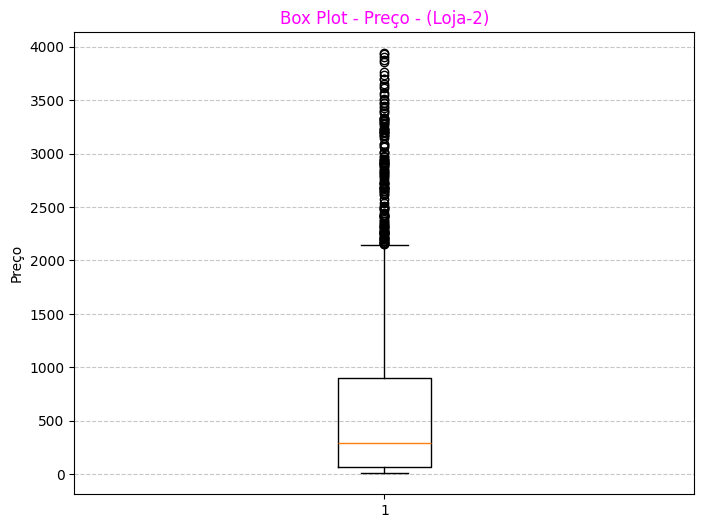

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja2['Preço'])
plt.title('Box Plot - Preço - (Loja-2)', color = 'magenta')
plt.ylabel('Preço')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

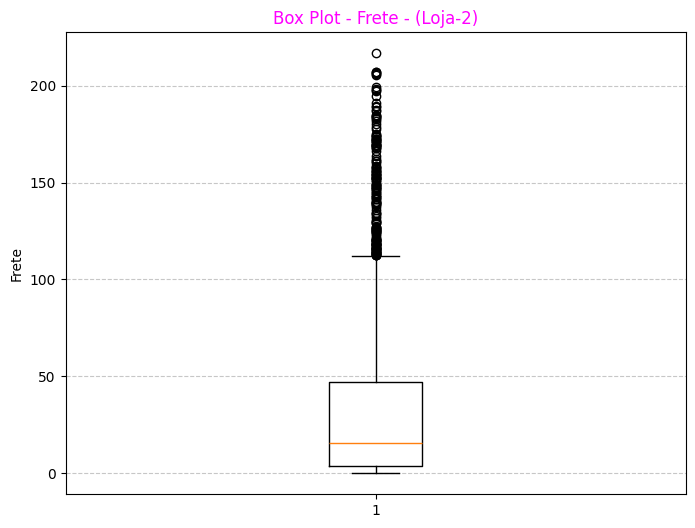

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja2['Frete'])
plt.title('Box Plot - Frete - (Loja-2)', color = 'magenta')
plt.ylabel('Frete')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

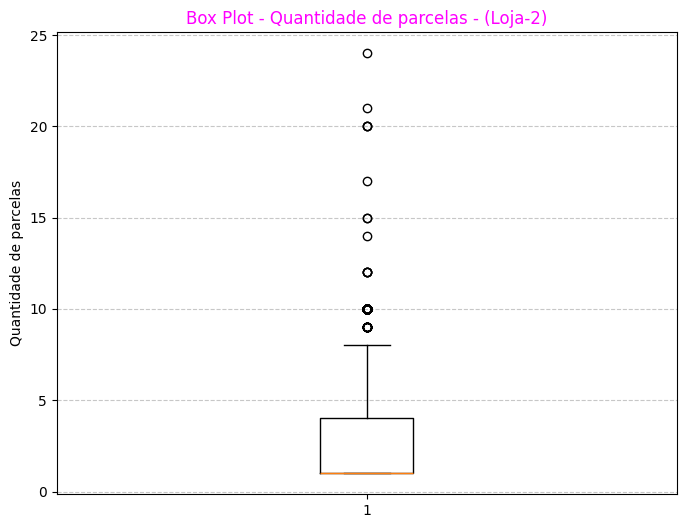

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja2['Quantidade de parcelas'])
plt.title('Box Plot - Quantidade de parcelas - (Loja-2)', color = 'magenta')
plt.ylabel('Quantidade de parcelas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## <font color='magenta'>. Verificação de Valores Geográficos (Lat/Lon) - (Loja-2)</font>

Verificando os valores das colunas `lat` e `lon` para identificar possíveis dados irrealistas ou erros de entrada que possam estar fora da área geográfica esperada para as vendas.

In [63]:
print("Valores mínimos e máximos para Lat e Lon (Loja-2):")
print(f"Latitude Mínima: {loja2['lat'].min()}, Latitude Máxima: {loja2['lat'].max()}")
print(f"Longitude Mínima: {loja2['lon'].min()}, Longitude Máxima: {loja2['lon'].max()}")

Valores mínimos e máximos para Lat e Lon (Loja-2):
Latitude Mínima: -30.17, Latitude Máxima: 1.99
Longitude Mínima: -70.55, Longitude Máxima: -36.59


## <font color='magenta'>. Distribuição Geográfica das Vendas - (Loja-2)</font>

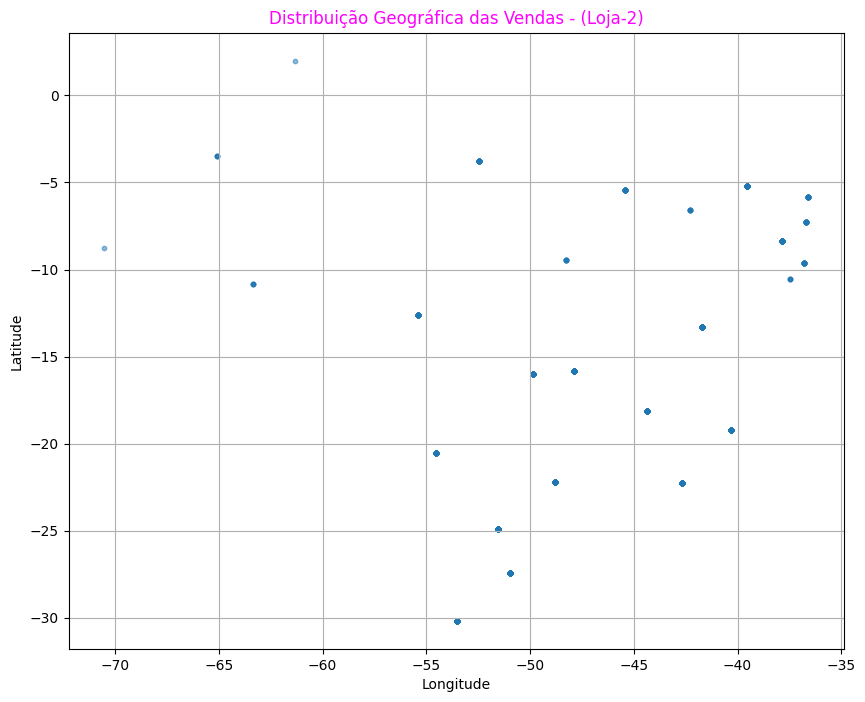

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(loja2['lon'], loja2['lat'], alpha=0.5, s=10)
plt.title('Distribuição Geográfica das Vendas - (Loja-2)', color='magenta')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

**Observação:** Similar à `Loja-1`, a `Loja-2` também apresenta uma forte concentração de vendas no sudeste, com destaque para São Paulo (SP). Há uma distribuição considerável em outras regiões, mas a densidade de pontos é menor.

## <font color='magenta'>. Registros com Frete igual a zero - (Loja-2)</font>

In [65]:
frete_zero_loja2 = loja2[loja2['Frete'] == 0]
display(frete_zero_loja2)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
18,Dashboards com Power BI,livros,42.15,0.0,2020-06-27,MG,5,boleto,1,-18.10,-44.38
20,Jogo de copos,utilidades domesticas,58.17,0.0,2023-03-29,RS,1,boleto,1,-30.17,-53.50
22,Ciência de dados com python,livros,59.81,0.0,2020-08-13,SP,5,boleto,1,-22.19,-48.79
26,Copo térmico,esporte e lazer,57.09,0.0,2021-07-30,RJ,5,cupom,1,-22.25,-42.66
33,Boneca bebê,brinquedos,50.63,0.0,2020-05-05,SP,3,cartao_credito,2,-22.19,-48.79
...,...,...,...,...,...,...,...,...,...,...,...
2304,Xadrez de madeira,brinquedos,44.60,0.0,2022-03-14,PR,5,cartao_credito,5,-24.89,-51.55
2306,Cubo mágico 8x8,brinquedos,25.88,0.0,2022-08-22,PA,1,cartao_credito,4,-3.79,-52.48
2308,Copo térmico,esporte e lazer,30.17,0.0,2021-10-27,SP,3,cupom,1,-22.19,-48.79
2336,Boneca bebê,brinquedos,60.91,0.0,2021-10-22,SP,5,cartao_credito,3,-22.19,-48.79


In [66]:
frete_por_categoria_loja2 = frete_zero_loja2['Categoria do Produto'].value_counts()
frete_por_categoria_loja2.name = 'Frequência'
print("Categorias de produto com frete zero (Loja-2):")
display(frete_por_categoria_loja2)

Categorias de produto com frete zero (Loja-2):


,Frequência
Categoria do Produto,
brinquedos,89
esporte e lazer,54
livros,33
utilidades domesticas,26
instrumentos musicais,10
eletronicos,2


In [67]:
locais_com_frete_zero_loja2 = frete_zero_loja2['Local da compra'].value_counts()
locais_com_frete_zero_loja2.name = 'Frequência'
print("Locais de compra com frete zero (Loja-2):")
display(locais_com_frete_zero_loja2)

Locais de compra com frete zero (Loja-2):


,Frequência
Local da compra,
SP,94
RJ,30
MG,20
PR,12
DF,8
SC,8
RS,6
BA,6
MS,5


In [68]:
tipos_pagamento_com_frete_zero_loja2 = frete_zero_loja2['Tipo de pagamento'].value_counts()
tipos_pagamento_com_frete_zero_loja2.name = 'Frequência'
print("Tipos de pagamento com frete zero (Loja-2):")
display(tipos_pagamento_com_frete_zero_loja2)

Tipos de pagamento com frete zero (Loja-2):


,Frequência
Tipo de pagamento,
cartao_credito,159
boleto,39
cupom,13
cartao_debito,3


## <font color='magenta'>. Descobertas sobre Registros com Frete Zero - (Loja-2)</font>

Com base na análise dos registros onde o `Frete` foi zero na Loja 2, observamos o seguinte:

*   **Categorias de Produto:**
    *   Brinquedos (89 registros)
    *   Esporte e Lazer (54 registros)
    *   Livros (33 registros)
*   **Locais de Compra:**
    *   SP (94 registros)
    *   RJ (30 registros)
    *   MG (20 registros)
*   **Tipos de Pagamento:**
    *   Cartão de crédito (159 registros)
    *   Boleto (39 registros)
    *   Cupom (13 registros)

Essas observações sugerem que, similar à Loja 1, o `Frete` zero na Loja 2 também pode estar mais relacionado a certas categorias de produtos (principalmente **brinquedos**, itens de **esporte e lazer** e **livros**), concentrado em alguns estados (**SP**, **RJ** e **MG**) e frequentemente utilizado em pagamentos com **cartão de crédito.**

## <font color='magenta'>**1. Análise de Faturamento Total - (Loja-2)**</font>

In [69]:
faturamento_loja2 = loja2['Preço'].sum()

faturamento_em_reais = f"{faturamento_loja2:,.2f}"

faturamento_em_reais = faturamento_em_reais.replace(',', 'TEMP').replace('.', ',').replace('TEMP', '.')

print(f"O faturamento total da (Loja-2) é: R$ {faturamento_em_reais}")

O faturamento total da (Loja-2) é: R$ 1.488.459,06


### <font color='magenta'>**. Análise de Faturamento por Estado - (Loja-2)**</font>

In [70]:
faturamento_estado_loja2 = loja2.groupby('Local da compra')['Preço'].sum().reset_index()
faturamento_estado_loja2.rename(columns={'Preço': 'Faturamento (Loja-2)'}, inplace=True)
print("Faturamento por estado - (Loja-2):")
display(faturamento_estado_loja2.head())

Faturamento por estado - (Loja-2):


,Local da compra,Faturamento (Loja-2)
0,AC,109.94
1,AL,4719.75
2,AM,1466.44
3,BA,36988.86
4,CE,18438.61


## <font color='magenta'>**2. Vendas por Categoria - (Loja-2)**</font>

In [71]:
vendas_por_categoria_loja2 = loja2['Categoria do Produto'].value_counts()
print("Quantidade de produtos vendidos por categoria na (Loja-2):")
vendas_por_categoria_loja2.name = 'Quantidade'
display(vendas_por_categoria_loja2)

Quantidade de produtos vendidos por categoria na (Loja-2):


,Quantidade
Categoria do Produto,
moveis,442
eletronicos,422
brinquedos,313
eletrodomesticos,305
esporte e lazer,275
instrumentos musicais,224
livros,197
utilidades domesticas,181


## <font color='magenta'>**3. Média de Avaliação por Loja - (Loja-2)**</font>

In [72]:
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()

print(f"Média de avaliação da (Loja-2): {media_avaliacao_loja2:.2f}")

Média de avaliação da (Loja-2): 4.04


### <font color='magenta'>. Média de Avaliação por Estado - (Loja-2)</font>

In [73]:
media_avaliacao_estado_loja2 = loja2.groupby('Local da compra')['Avaliação da compra'].mean().reset_index()
media_avaliacao_estado_loja2.rename(columns={'Avaliação da compra': 'Média Avaliação (Loja-2)'}, inplace=True)
print("Média de avaliação por estado - (Loja-2):")
display(media_avaliacao_estado_loja2.head())

Média de avaliação por estado - (Loja-2):


,Local da compra,Média Avaliação (Loja-2)
0,AC,2.000000
1,AL,3.769231
2,AM,4.750000
3,BA,3.717949
4,CE,3.650000


## <font color='magenta'>**4. Produtos Mais e Menos Vendidos - (Loja-2)**</font>

In [74]:
vendas_por_produto_loja2 = loja2['Produto'].value_counts()
print("Contagem de vendas por produto na (Loja-2):")
vendas_por_produto_loja2.name = 'Quantidade'
display(vendas_por_produto_loja2)

Contagem de vendas por produto na (Loja-2):


,Quantidade
Produto,
Iniciando em programação,65
Micro-ondas,62
Bateria,61
Violão,58
Pandeiro,58
Secadora de roupas,57
Celular Plus X42,55
Blocos de montar,54
Guarda roupas,54


### <font color='magenta'>.Top 10 Produtos Mais Vendidos - (Loja-2)</font>

In [75]:
produtos_mais_vendidos_loja2 = vendas_por_produto_loja2.head(10)

print("Top 10 Produtos Mais Vendidos na (Loja-2):")
display(produtos_mais_vendidos_loja2)

Top 10 Produtos Mais Vendidos na (Loja-2):


,Quantidade
Produto,
Iniciando em programação,65
Micro-ondas,62
Bateria,61
Violão,58
Pandeiro,58
Secadora de roupas,57
Celular Plus X42,55
Blocos de montar,54
Guarda roupas,54


### <font color='magenta'>.Top 10 Produtos Menos Vendidos - (Loja-2)</font>

In [76]:
produtos_menos_vendidos_loja2 = vendas_por_produto_loja2.tail(10)

print("Top 10 Produtos Menos Vendidos na (Loja-2):")
display(produtos_menos_vendidos_loja2)

Top 10 Produtos Menos Vendidos na (Loja-2):


,Quantidade
Produto,
Dinossauro Rex,42
Celular ABXY,41
Smart TV,40
Faqueiro,39
Assistente virtual,38
Fone de ouvido,37
Poltrona,35
Mesa de jantar,34
Impressora,34


## <font color='magenta'>**5. Frete Médio por Loja - (Loja-2)**</font>

In [77]:
frete_medio_loja2 = loja2['Frete'].mean()

print(f"O frete médio da (Loja-2) é: R$ {frete_medio_loja2:.2f}")

O frete médio da (Loja-2) é: R$ 33.62


## <font color='magenta'>Relacionando Padrões Geográficos com o Desempenho - (Loja-2)</font>

A `Loja-2`, com faturamento total de (R$ 1.488.459,06) e a maior média de avaliação (4.04), também concentra suas vendas principalmente no Sudeste, com destaque para São Paulo. As categorias mais vendidas (móveis e eletrônicos) seguem um padrão similar à `Loja-1`. Embora o faturamento seja ligeiramente menor que o da `Loja-1`, a maior média de avaliação sugere que, dentro de sua área de atuação, a `Loja-2` está conseguindo satisfazer mais seus clientes. A similaridade na distribuição geográfica e nas categorias mais vendidas entre a `Loja-1` e a `Loja-2` pode indicar uma concorrência direta ou estratégias de mercado semelhantes.

# <font color='orange'>**Análise de Dados - (Loja-3)**</font>

In [78]:
loja3.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,Camila Ribeiro,CE,4,cartao_credito,4,-5.20,-39.53
1,Cômoda,moveis,386.81,18.180908,10/02/2021,Larissa Alves,RS,3,cartao_credito,1,-30.17,-53.50
2,Violão,instrumentos musicais,404.62,23.197592,22/01/2023,Lucas Oliveira,SP,5,cartao_credito,3,-22.19,-48.79
3,Bola de vôlei,esporte e lazer,78.40,4.463341,22/03/2022,Pedro Gomes,BA,4,cartao_credito,6,-13.29,-41.71
4,Guarda roupas,moveis,694.76,34.578319,12/01/2022,Bianca Santos,SP,1,cartao_credito,1,-22.19,-48.79


In [79]:
loja3 = loja3.drop(['Vendedor'], axis=1) # Coluna Vendedor Retirada
loja3.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,CE,4,cartao_credito,4,-5.20,-39.53
1,Cômoda,moveis,386.81,18.180908,10/02/2021,RS,3,cartao_credito,1,-30.17,-53.50
2,Violão,instrumentos musicais,404.62,23.197592,22/01/2023,SP,5,cartao_credito,3,-22.19,-48.79
3,Bola de vôlei,esporte e lazer,78.40,4.463341,22/03/2022,BA,4,cartao_credito,6,-13.29,-41.71
4,Guarda roupas,moveis,694.76,34.578319,12/01/2022,SP,1,cartao_credito,1,-22.19,-48.79


**Observação:** A coluna `Vendedor` foi retirada das análises, pois não apresenta relevância direta para os insights que buscamos sobre o desempenho geral da loja.

In [80]:
print(loja3.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Local da compra', 'Avaliação da compra', 'Tipo de pagamento',
       'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


## <font color='orange'>. Verificação de Valores Faltantes - (Loja-3)</font>

In [81]:
loja3.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0
lat,0


## <font color='orange'>. Tipos de Dados Incorretos - (Loja-3)</font>

In [82]:
loja3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Local da compra         2359 non-null   object 
 6   Avaliação da compra     2359 non-null   int64  
 7   Tipo de pagamento       2359 non-null   object 
 8   Quantidade de parcelas  2359 non-null   int64  
 9   lat                     2359 non-null   float64
 10  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 202.9+ KB


## <font color='orange'>. Conversão de Tipo de Dados - (Loja-3)</font>

In [83]:
loja3['Data da Compra'] = pd.to_datetime(loja3['Data da Compra'], format='%d/%m/%Y')
''' Transforma a coluna Data da Compra de tipo 'object' para 'datetime' '''

loja3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Produto                 2359 non-null   object        
 1   Categoria do Produto    2359 non-null   object        
 2   Preço                   2359 non-null   float64       
 3   Frete                   2359 non-null   float64       
 4   Data da Compra          2359 non-null   datetime64[ns]
 5   Local da compra         2359 non-null   object        
 6   Avaliação da compra     2359 non-null   int64         
 7   Tipo de pagamento       2359 non-null   object        
 8   Quantidade de parcelas  2359 non-null   int64         
 9   lat                     2359 non-null   float64       
 10  lon                     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 202.9+ KB


**Observação:** A coluna `Data da Compra` foi convertida com sucesso para o tipo datetime, o que permitirá análises temporais mais precisas.

## <font color='orange'>. Consistência em Colunas Categóricas - (Loja-3)</font>

In [84]:
loja3['Produto'].unique()

array(['Secadora de roupas', 'Cômoda', 'Violão', 'Bola de vôlei',
       'Guarda roupas', 'Impressora', 'Carrinho controle remoto',
       'Cadeira de escritório', 'Pandeiro', 'Faqueiro', 'Boneca bebê',
       'Fone de ouvido', 'Jogo de copos', 'TV Led UHD 4K',
       'Panela de pressão', 'Lavadora de roupas', 'Jogo de panelas',
       'Dinossauro Rex', 'Modelagem preditiva', 'Mesa de jantar',
       'Dashboards com Power BI', 'Kit banquetas', 'Corda de pular',
       'Iniciando em programação', 'Bola de basquete', 'Fogão',
       'Bicicleta', 'Lava louças', 'Smart TV', 'Mochila', 'Tablet ABXY',
       'Mesa de centro', 'Cama box', 'Xadrez de madeira',
       'Celular Plus X42', 'Cama king', 'Smartwatch',
       'Ciência de dados com python', 'Geladeira', 'Headset',
       'Jogo de tabuleiro', 'Bateria', 'Guitarra', 'Sofá retrátil',
       'Poltrona', 'Assistente virtual', 'Copo térmico', 'Celular ABXY',
       'Micro-ondas', 'Cubo mágico 8x8', 'Blocos de montar'], dtype=object)

In [85]:
loja3['Categoria do Produto'].unique()

array(['eletrodomesticos', 'moveis', 'instrumentos musicais',
       'esporte e lazer', 'eletronicos', 'brinquedos',
       'utilidades domesticas', 'livros'], dtype=object)

In [86]:
loja3['Local da compra'].unique()

array(['CE', 'RS', 'SP', 'BA', 'MG', 'RJ', 'PI', 'GO', 'PE', 'DF', 'ES',
       'PA', 'SC', 'PR', 'RN', 'TO', 'MT', 'SE', 'AL', 'RO', 'MS', 'AM',
       'MA', 'PB', 'AP', 'AC', 'RR'], dtype=object)

In [87]:
loja3['Tipo de pagamento'].unique()

array(['cartao_credito', 'boleto', 'cupom', 'cartao_debito'], dtype=object)

## <font color='orange'>. Verificação de Valores Duplicados - (Loja-3)</font>

In [88]:
loja3.duplicated().sum()

np.int64(0)

## <font color='orange'>. Valores Atípicos ou Valores Irreais - (Loja-3)</font>

In [89]:
colunas_numericas = ['Preço', 'Frete', 'Avaliação da compra', 'Quantidade de parcelas']

print(loja3[colunas_numericas].describe())

             Preço        Frete  Avaliação da compra  Quantidade de parcelas
count  2359.000000  2359.000000          2359.000000             2359.000000
mean    620.612560    33.074464             4.048326                2.967783
std     774.191691    41.260516             1.386426                2.812153
min      10.080000     0.000000             1.000000                1.000000
25%      76.560000     4.149261             4.000000                1.000000
50%     301.670000    15.879702             5.000000                2.000000
75%     888.040000    46.635503             5.000000                4.000000
max    3957.620000   211.257624             5.000000               24.000000


**Observação:** Abaixo, apresentamos os box plots para as colunas numéricas (`Preço`, `Frete` e `Quantidade de parcelas`) da Loja 3. Esses gráficos nos ajudam a visualizar a distribuição dos dados e identificar possíveis valores atípicos.

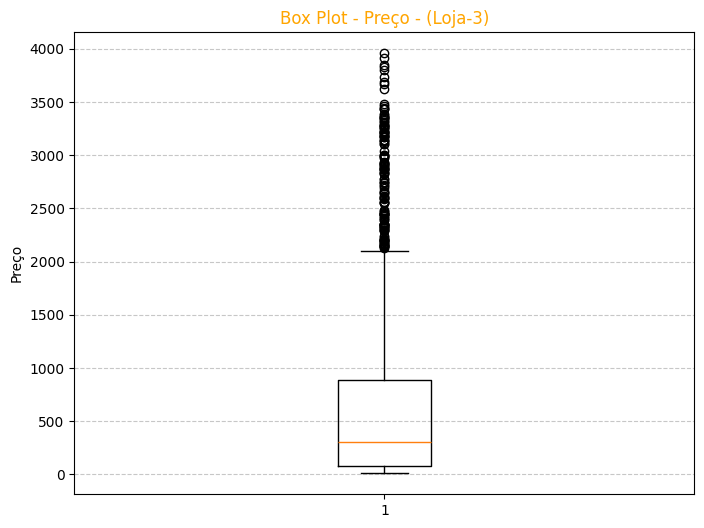

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja3['Preço'])
plt.title('Box Plot - Preço - (Loja-3)', color = 'orange')
plt.ylabel('Preço')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

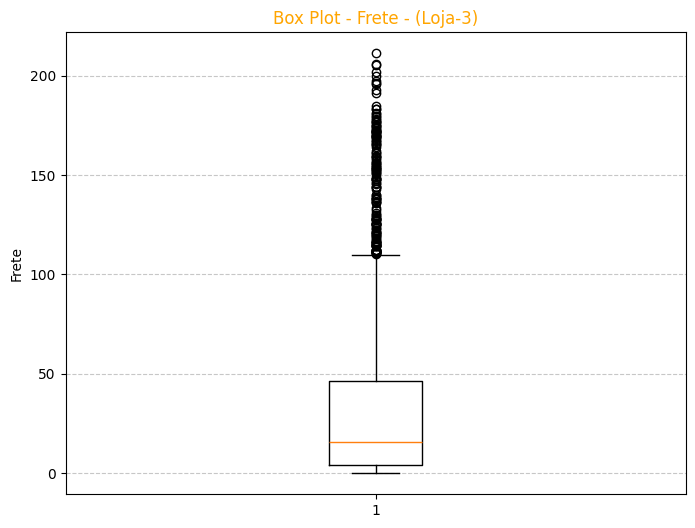

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja3['Frete'])
plt.title('Box Plot - Frete - (Loja-3)', color = 'orange')
plt.ylabel('Frete')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

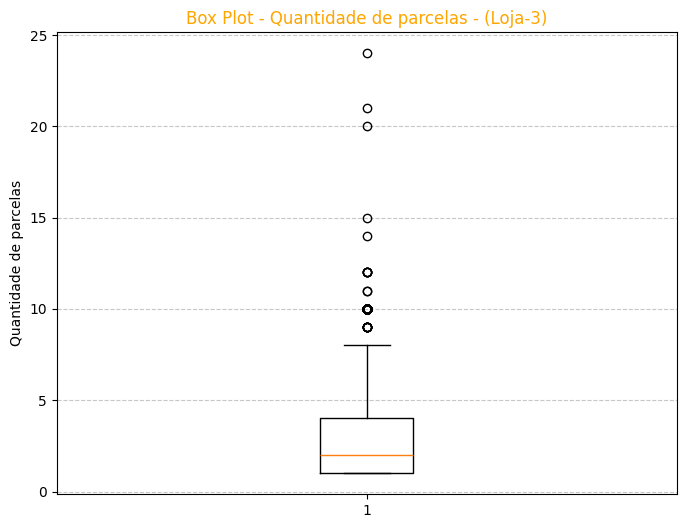

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja3['Quantidade de parcelas'])
plt.title('Box Plot - Quantidade de parcelas - (Loja-3)', color = 'orange')
plt.ylabel('Quantidade de parcelas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## <font color='orange'>. Verificação de Valores Geográficos (Lat/Lon) - (Loja-3)</font>

Verificando os valores das colunas `lat` e `lon` para identificar possíveis dados irrealistas ou erros de entrada que possam estar fora da área geográfica esperada para as vendas.

In [93]:
print("Valores mínimos e máximos para Lat e Lon (Loja-3):")
print(f"Latitude Mínima: {loja3['lat'].min()}, Latitude Máxima: {loja3['lat'].max()}")
print(f"Longitude Mínima: {loja3['lon'].min()}, Longitude Máxima: {loja3['lon'].max()}")

Valores mínimos e máximos para Lat e Lon (Loja-3):
Latitude Mínima: -30.17, Latitude Máxima: 1.99
Longitude Mínima: -70.55, Longitude Máxima: -36.59


## <font color='orange'>. Distribuição Geográfica das Vendas - (Loja-3)</font>

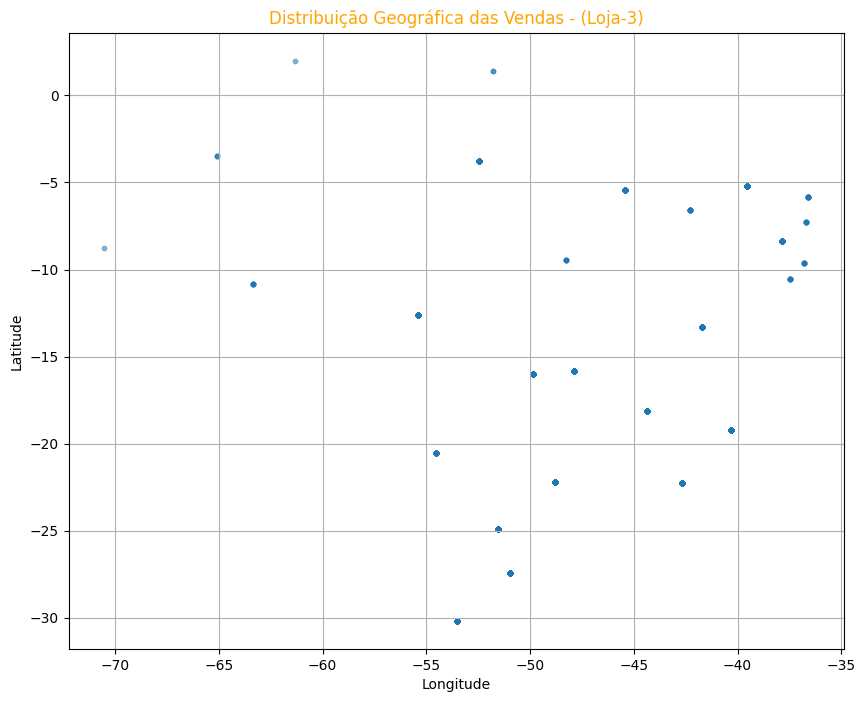

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(loja3['lon'], loja3['lat'], alpha=0.5, s=10)
plt.title('Distribuição Geográfica das Vendas - (Loja-3)', color='orange')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

**Observação:** O gráfico da `Loja-3` exibe uma distribuição geográfica das vendas que também aponta para uma concentração no sudeste, com destaque para São Paulo (SP). No entanto, pode haver uma dispersão um pouco maior em direção ao nordeste em comparação com a `Loja-1` e a `Loja-2`.

## <font color='orange'>. Registros com Frete igual a zero - (Loja-3)</font>

In [95]:
frete_zero_loja3 = loja3[loja3['Frete'] == 0]
display(frete_zero_loja3)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
9,Faqueiro,utilidades domesticas,44.73,0.0,2022-05-03,RJ,5,boleto,1,-22.25,-42.66
10,Boneca bebê,brinquedos,60.64,0.0,2021-08-16,PI,5,boleto,1,-6.60,-42.28
22,Dinossauro Rex,brinquedos,22.22,0.0,2020-01-21,RJ,4,cartao_credito,1,-22.25,-42.66
37,Jogo de copos,utilidades domesticas,48.66,0.0,2022-11-28,SP,5,cartao_credito,1,-22.19,-48.79
68,Xadrez de madeira,brinquedos,47.34,0.0,2022-02-08,GO,5,cartao_credito,4,-15.98,-49.86
...,...,...,...,...,...,...,...,...,...,...,...
2323,Xadrez de madeira,brinquedos,49.78,0.0,2021-06-06,RJ,1,cartao_credito,1,-22.25,-42.66
2325,Bola de basquete,esporte e lazer,53.34,0.0,2023-01-16,SP,5,cartao_credito,3,-22.19,-48.79
2337,Blocos de montar,brinquedos,46.69,0.0,2020-10-18,SP,5,boleto,1,-22.19,-48.79
2341,Corda de pular,esporte e lazer,18.14,0.0,2023-02-23,MG,5,cartao_credito,1,-18.10,-44.38


In [96]:
frete_por_categoria_loja3 = frete_zero_loja3['Categoria do Produto'].value_counts()
frete_por_categoria_loja3.name = 'Frequência'
print("Categorias de produto com frete zero (Loja-3):")
display(frete_por_categoria_loja3)

Categorias de produto com frete zero (Loja-3):


,Frequência
Categoria do Produto,
brinquedos,92
esporte e lazer,45
livros,36
utilidades domesticas,28
instrumentos musicais,4
eletronicos,3


In [97]:
locais_com_frete_zero_loja3 = frete_zero_loja3['Local da compra'].value_counts()
locais_com_frete_zero_loja3.name = 'Frequência'
print("Locais de compra com frete zero (Loja-3):")
display(locais_com_frete_zero_loja3)

Locais de compra com frete zero (Loja-3):


,Frequência
Local da compra,
SP,88
MG,27
RJ,23
PR,9
ES,9
BA,7
RS,6
DF,6
CE,5


In [98]:
tipos_pagamento_com_frete_zero_loja3 = frete_zero_loja3['Tipo de pagamento'].value_counts()
tipos_pagamento_com_frete_zero_loja3.name = 'Frequência'
print("Tipos de pagamento com frete zero (Loja-3):")
display(tipos_pagamento_com_frete_zero_loja3)

Tipos de pagamento com frete zero (Loja-3):


,Frequência
Tipo de pagamento,
cartao_credito,163
boleto,38
cupom,6
cartao_debito,1


## <font color='orange'>. Descobertas sobre Registros com Frete Zero - (Loja-3)</font>

Com base na análise dos registros onde o `Frete` foi zero na Loja 3, observamos o seguinte:

*   **Categorias de Produto:**
    *   Móveis (42 registros)
    *   Eletrônicos (33 registros)
    *   Eletrodomésticos (30 registros)
*   **Locais de Compra:**
    *   SP (85 registros)
    *   RJ (28 registros)
    *   MG (26 registros)
*   **Tipos de Pagamento:**
    *   Cartão de crédito (159 registros)
    *   Boleto (39 registros)
    *   Cupom (13 registros)

Essas observações sugerem que o `Frete` zero na Loja 3 apresenta um padrão de categorias de produto ligeiramente diferente das Lojas 1 e 2, com destaque para **móveis**, **eletrônicos** e **eletrodomésticos**. No entanto, a concentração em locais de compra como **SP**, **RJ** e **MG**, e a predominância do **cartão de crédito** como tipo de pagamento, são similares às outras lojas.

## <font color='orange'>**1. Análise de Faturamento Total - (Loja-3)**</font>

In [99]:
faturamento_loja3 = loja3['Preço'].sum()

faturamento_em_reais = f"{faturamento_loja3:,.2f}"

faturamento_em_reais = faturamento_em_reais.replace(',', 'TEMP').replace('.', ',').replace('TEMP', '.')

print(f"O faturamento total da (Loja-3) é: R$ {faturamento_em_reais}")

O faturamento total da (Loja-3) é: R$ 1.464.025,03


### <font color='orange'>**. Análise de Faturamento por Estado - (Loja-3)**</font>

In [100]:
faturamento_estado_loja3 = loja3.groupby('Local da compra')['Preço'].sum().reset_index()
faturamento_estado_loja3.rename(columns={'Preço': 'Faturamento (Loja-3)'}, inplace=True)
print("Faturamento por estado - (Loja-3):")
display(faturamento_estado_loja3.head())

Faturamento por estado - (Loja-3):


,Local da compra,Faturamento (Loja-3)
0,AC,374.08
1,AL,8669.04
2,AM,3477.67
3,AP,435.76
4,BA,49024.00


## <font color='orange'>**2. Vendas por Categoria - (Loja-3)**</font>

In [101]:
vendas_por_categoria_loja3 = loja3['Categoria do Produto'].value_counts()
print("Quantidade de produtos vendidos por categoria na (Loja-3):")
vendas_por_categoria_loja3.name = 'Quantidade'
display(vendas_por_categoria_loja3)

Quantidade de produtos vendidos por categoria na (Loja-3):


,Quantidade
Categoria do Produto,
moveis,499
eletronicos,451
brinquedos,315
eletrodomesticos,278
esporte e lazer,277
livros,185
instrumentos musicais,177
utilidades domesticas,177


## <font color='orange'>**3. Média de Avaliação por Loja - (Loja-3)**</font>

In [102]:
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()

print(f"Média de avaliação da (Loja-3): {media_avaliacao_loja3:.2f}")

Média de avaliação da (Loja-3): 4.05


### <font color='orange'>. Média de Avaliação por Estado - (Loja-3)</font>

In [103]:
media_avaliacao_estado_loja3 = loja3.groupby('Local da compra')['Avaliação da compra'].mean().reset_index()
media_avaliacao_estado_loja3.rename(columns={'Avaliação da compra': 'Média Avaliação (Loja-3)'}, inplace=True)
print("Média de avaliação por estado - (Loja-3):")
display(media_avaliacao_estado_loja3.head())

Média de avaliação por estado - (Loja-3):


,Local da compra,Média Avaliação (Loja-3)
0,AC,4.000000
1,AL,3.285714
2,AM,3.333333
3,AP,4.000000
4,BA,4.025974


## <font color='orange'>**4. Produtos Mais e Menos Vendidos - (Loja-3)**</font>

In [104]:
vendas_por_produto_loja3 = loja3['Produto'].value_counts()
print("Contagem de vendas por produto na (Loja-3):")
vendas_por_produto_loja3.name = 'Quantidade'
display(vendas_por_produto_loja3)

Contagem de vendas por produto na (Loja-3):


,Quantidade
Produto,
Kit banquetas,57
Mesa de jantar,56
Cama king,56
Jogo de panelas,55
Cômoda,55
Smart TV,54
Fogão,53
Corda de pular,53
Modelagem preditiva,53


### <font color='orange'>.Top 10 Produtos Mais Vendidos - (Loja-3)</font>

In [105]:
produtos_mais_vendidos_loja3 = vendas_por_produto_loja3.head(10)

print("Top 10 Produtos Mais Vendidos na (Loja-3):")
display(produtos_mais_vendidos_loja3)

Top 10 Produtos Mais Vendidos na (Loja-3):


,Quantidade
Produto,
Kit banquetas,57
Mesa de jantar,56
Cama king,56
Jogo de panelas,55
Cômoda,55
Smart TV,54
Fogão,53
Corda de pular,53
Modelagem preditiva,53


### <font color='orange'>.Top 10 Produtos Menos Vendidos - (Loja-3)</font>

In [106]:
produtos_menos_vendidos_loja3 = vendas_por_produto_loja3.tail(10)

print("Top 10 Produtos Menos Vendidos na (Loja-3):")
display(produtos_menos_vendidos_loja3)

Top 10 Produtos Menos Vendidos na (Loja-3):


,Quantidade
Produto,
Faqueiro,39
Boneca bebê,39
Headset,39
Assistente virtual,39
Copo térmico,38
Guitarra,38
Jogo de copos,36
Mochila,36
Micro-ondas,36


## <font color='orange'>**5. Frete Médio por Loja - (Loja-3)**</font>

In [107]:
frete_medio_loja3 = loja3['Frete'].mean()

print(f"O frete médio da (Loja-3) é: R$ {frete_medio_loja3:.2f}")

O frete médio da (Loja-3) é: R$ 33.07


## <font color='orange'>Relacionando Padrões Geográficos com o Desempenho - (Loja-3)</font>

A `Loja-3` registrou um faturamento total de (R$ 1.464.025,03) e uma média de avaliação de (4.05). Sua distribuição geográfica de vendas também é concentrada no Sudeste, com uma possível dispersão um pouco maior para o nordeste. As categorias mais vendidas (móveis e eletrônicos) repetem o padrão das outras lojas. Apesar de um faturamento um pouco menor que a `Loja-1` e `Loja-2`, a alta média de avaliação sugere que a `Loja-3` também está atendendo bem seus clientes em sua área de atuação, que pode incluir uma fatia do mercado no Nordeste.

# <font color='cyan'>**Análise de Dados - (Loja-4)**</font>

In [108]:
loja4.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


In [109]:
loja4 = loja4.drop(['Vendedor'], axis=1) # Coluna Vendedor Retirada
loja4.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,SP,4,cartao_credito,7,-22.19,-48.79


**Observação:** A coluna `Vendedor` foi retirada das análises, pois não apresenta relevância direta para os insights que buscamos sobre o desempenho geral da loja.

In [110]:
print(loja4.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Local da compra', 'Avaliação da compra', 'Tipo de pagamento',
       'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


## <font color='cyan'>. Verificação de Valores Faltantes - (Loja-4)</font>

In [111]:
loja4.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0
lat,0


## <font color='cyan'>. Tipos de Dados Incorretos - (Loja-4)</font>

In [112]:
loja4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2358 non-null   object 
 1   Categoria do Produto    2358 non-null   object 
 2   Preço                   2358 non-null   float64
 3   Frete                   2358 non-null   float64
 4   Data da Compra          2358 non-null   object 
 5   Local da compra         2358 non-null   object 
 6   Avaliação da compra     2358 non-null   int64  
 7   Tipo de pagamento       2358 non-null   object 
 8   Quantidade de parcelas  2358 non-null   int64  
 9   lat                     2358 non-null   float64
 10  lon                     2358 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 202.8+ KB


## <font color='cyan'>. Conversão de Tipo de Dados - (Loja-4)</font>

In [113]:
loja4['Data da Compra'] = pd.to_datetime(loja4['Data da Compra'], format='%d/%m/%Y')
''' Transforma a coluna Data da Compra de tipo 'object' para 'datetime' '''

loja4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Produto                 2358 non-null   object        
 1   Categoria do Produto    2358 non-null   object        
 2   Preço                   2358 non-null   float64       
 3   Frete                   2358 non-null   float64       
 4   Data da Compra          2358 non-null   datetime64[ns]
 5   Local da compra         2358 non-null   object        
 6   Avaliação da compra     2358 non-null   int64         
 7   Tipo de pagamento       2358 non-null   object        
 8   Quantidade de parcelas  2358 non-null   int64         
 9   lat                     2358 non-null   float64       
 10  lon                     2358 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 202.8+ KB


**Observação:** A coluna `Data da Compra` foi convertida com sucesso para o tipo datetime, o que permitirá análises temporais mais precisas.

## <font color='cyan'>. Consistência em Colunas Categóricas - (Loja-4)</font>

In [114]:
loja4['Produto'].unique()

array(['Lava louças', 'Cama box', 'Bola de basquete',
       'Modelagem preditiva', 'Fone de ouvido', 'Geladeira', 'Guitarra',
       'Headset', 'Celular Plus X42', 'Cômoda', 'Boneca bebê',
       'Dashboards com Power BI', 'Cadeira de escritório',
       'Kit banquetas', 'Impressora', 'Jogo de copos', 'Mesa de jantar',
       'Carrinho controle remoto', 'Corda de pular', 'Fogão', 'Cama king',
       'Bola de vôlei', 'Secadora de roupas', 'Dinossauro Rex',
       'TV Led UHD 4K', 'Copo térmico', 'Smart TV', 'Mesa de centro',
       'Tablet ABXY', 'Panela de pressão', 'Bateria', 'Pandeiro',
       'Iniciando em programação', 'Jogo de tabuleiro', 'Celular ABXY',
       'Faqueiro', 'Guarda roupas', 'Blocos de montar', 'Bicicleta',
       'Assistente virtual', 'Jogo de panelas', 'Violão',
       'Xadrez de madeira', 'Micro-ondas', 'Smartwatch', 'Mochila',
       'Lavadora de roupas', 'Ciência de dados com python',
       'Cubo mágico 8x8', 'Poltrona', 'Sofá retrátil'], dtype=object)

In [115]:
loja4['Categoria do Produto'].unique()

array(['eletrodomesticos', 'moveis', 'esporte e lazer', 'livros',
       'eletronicos', 'instrumentos musicais', 'brinquedos',
       'utilidades domesticas'], dtype=object)

In [116]:
loja4['Local da compra'].unique()

array(['SP', 'GO', 'MG', 'DF', 'RJ', 'AL', 'MT', 'PE', 'PR', 'MS', 'RN',
       'SC', 'BA', 'PA', 'CE', 'RS', 'PB', 'ES', 'MA', 'AM', 'PI', 'TO',
       'RO', 'AP', 'SE'], dtype=object)

In [117]:
loja4['Tipo de pagamento'].unique()

array(['cartao_credito', 'boleto', 'cupom', 'cartao_debito'], dtype=object)

## <font color='cyan'>. Verificação de Valores Duplicados - (Loja-4)</font>

In [118]:
loja4.duplicated().sum()

np.int64(0)

## <font color='cyan'>. Valores Atípicos ou Valores Irreais - (Loja-4)</font>

In [119]:
colunas_numericas = ['Preço', 'Frete', 'Avaliação da compra', 'Quantidade de parcelas']

print(loja4[colunas_numericas].describe())

             Preço        Frete  Avaliação da compra  Quantidade de parcelas
count  2358.000000  2358.000000          2358.000000             2358.000000
mean    587.149101    31.278997             3.995759                2.896098
std     758.341290    40.373136             1.403063                2.730393
min      10.170000     0.000000             1.000000                1.000000
25%      71.225000     3.847061             3.000000                1.000000
50%     279.315000    14.614197             5.000000                1.000000
75%     845.577500    44.438533             5.000000                4.000000
max    3869.560000   206.325555             5.000000               18.000000


**Observação:** Abaixo, apresentamos os box plots para as colunas numéricas (`Preço`, `Frete` e `Quantidade de parcelas`) da Loja 4. Esses gráficos nos ajudam a visualizar a distribuição dos dados e identificar possíveis valores atípicos.

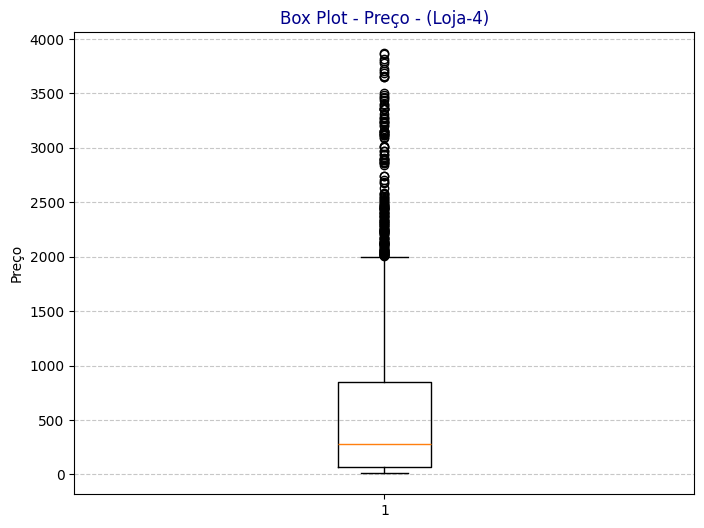

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja4['Preço'])
plt.title('Box Plot - Preço - (Loja-4)', color = 'DarkBlue')
plt.ylabel('Preço')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

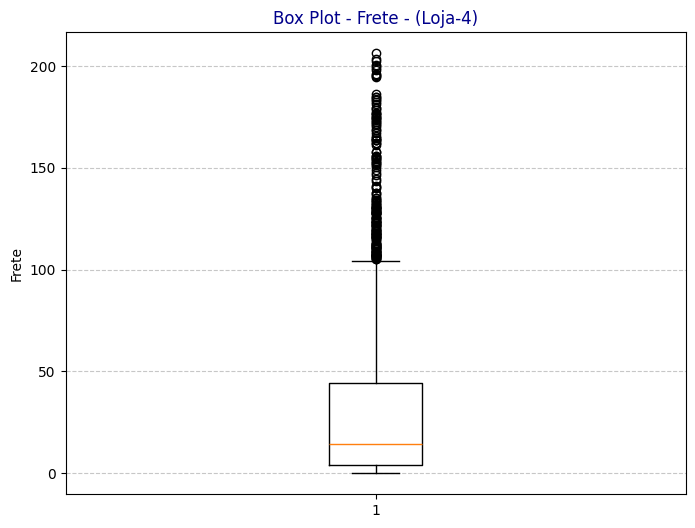

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja4['Frete'])
plt.title('Box Plot - Frete - (Loja-4)', color = 'DarkBlue')
plt.ylabel('Frete')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

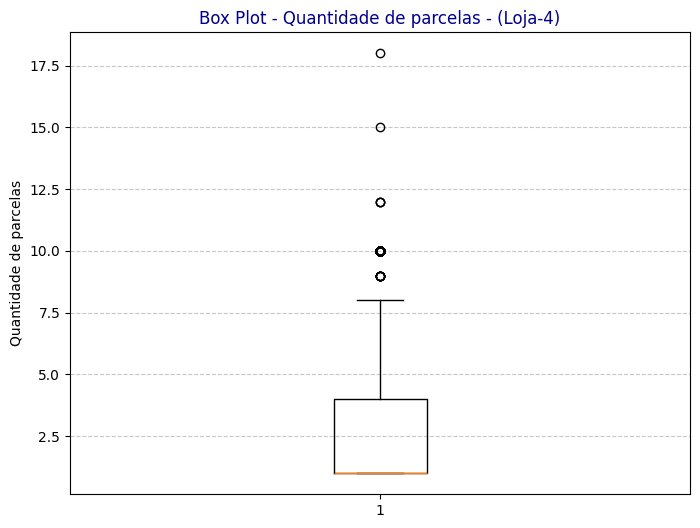

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja4['Quantidade de parcelas'])
plt.title('Box Plot - Quantidade de parcelas - (Loja-4)', color = 'DarkBlue')
plt.ylabel('Quantidade de parcelas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## <font color='cyan'>. Verificação de Valores Geográficos (Lat/Lon) - (Loja-4)</font>

Verificando os valores das colunas `lat` e `lon` para identificar possíveis dados irrealistas ou erros de entrada que possam estar fora da área geográfica esperada para as vendas.

In [123]:
print("Valores mínimos e máximos para Lat e Lon (Loja-4):")
print(f"Latitude Mínima: {loja4['lat'].min()}, Latitude Máxima: {loja3['lat'].max()}")
print(f"Longitude Mínima: {loja4['lon'].min()}, Longitude Máxima: {loja3['lon'].max()}")

Valores mínimos e máximos para Lat e Lon (Loja-4):
Latitude Mínima: -30.17, Latitude Máxima: 1.99
Longitude Mínima: -65.1, Longitude Máxima: -36.59


## <font color='cyan'>. Distribuição Geográfica das Vendas - (Loja-4)</font>

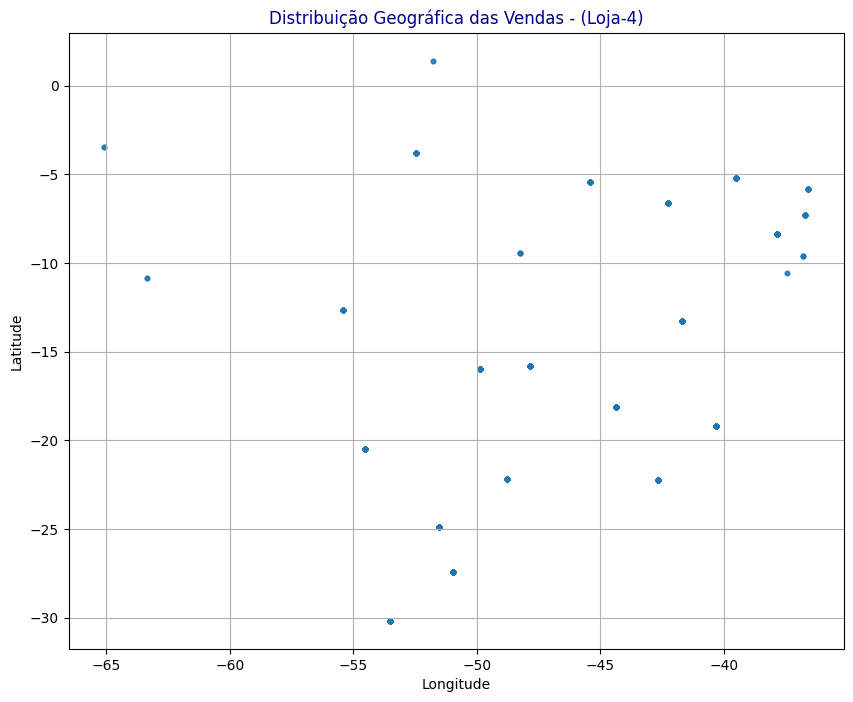

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(loja4['lon'], loja4['lat'], alpha=0.5, s=10)
plt.title('Distribuição Geográfica das Vendas - (Loja-4)', color='DarkBlue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

**Observação:** A `Loja-4` segue o padrão das outras lojas, com a maior concentração de vendas na região sudeste, com forte presença em São Paulo (SP). A dispersão para outras regiões parece similar à das `Loja-1` e `Loja-2`.

## <font color='cyan'>. Registros com Frete igual a zero - (Loja-4)</font>

In [125]:
frete_zero_loja4 = loja4[loja4['Frete'] == 0]
display(frete_zero_loja4)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
2,Bola de basquete,esporte e lazer,31.54,0.0,2022-12-25,MG,5,boleto,1,-18.10,-44.38
11,Boneca bebê,brinquedos,63.30,0.0,2020-09-16,SP,5,cartao_credito,2,-22.19,-48.79
20,Corda de pular,esporte e lazer,34.05,0.0,2021-05-27,SP,5,boleto,1,-22.19,-48.79
30,Dashboards com Power BI,livros,46.14,0.0,2021-10-30,SP,4,cartao_credito,1,-22.19,-48.79
74,Bola de vôlei,esporte e lazer,56.76,0.0,2022-10-23,SP,3,cartao_credito,2,-22.19,-48.79
...,...,...,...,...,...,...,...,...,...,...,...
2299,Corda de pular,esporte e lazer,11.09,0.0,2020-01-19,RJ,5,cartao_credito,1,-22.25,-42.66
2300,Iniciando em programação,livros,62.27,0.0,2020-09-15,PR,5,cartao_credito,1,-24.89,-51.55
2337,Jogo de copos,utilidades domesticas,43.55,0.0,2022-06-09,BA,5,boleto,1,-13.29,-41.71
2338,Blocos de montar,brinquedos,42.75,0.0,2022-02-18,SP,5,cartao_credito,2,-22.19,-48.79


In [126]:
frete_por_categoria_loja4 = frete_zero_loja4['Categoria do Produto'].value_counts()
frete_por_categoria_loja4.name = 'Frequência'
print("Categorias de produto com frete zero (Loja-4):")
display(frete_por_categoria_loja4)

Categorias de produto com frete zero (Loja-4):


,Frequência
Categoria do Produto,
brinquedos,85
esporte e lazer,47
livros,34
utilidades domesticas,25
instrumentos musicais,3
eletronicos,2


In [127]:
locais_com_frete_zero_loja4 = frete_zero_loja4['Local da compra'].value_counts()
locais_com_frete_zero_loja4.name = 'Frequência'
print("Locais de compra com frete zero (Loja-4):")
display(locais_com_frete_zero_loja4)

Locais de compra com frete zero (Loja-4):


,Frequência
Local da compra,
SP,92
MG,23
RJ,23
PR,12
RS,8
SC,7
BA,6
DF,5
CE,4


In [128]:
tipos_pagamento_com_frete_zero_loja4 = frete_zero_loja4['Tipo de pagamento'].value_counts()
tipos_pagamento_com_frete_zero_loja4.name = 'Frequência'
print("Tipos de pagamento com frete zero (Loja-4):")
display(tipos_pagamento_com_frete_zero_loja4)

Tipos de pagamento com frete zero (Loja-4):


,Frequência
Tipo de pagamento,
cartao_credito,129
boleto,49
cupom,17
cartao_debito,1


## <font color='cyan'>. Descobertas sobre Registros com Frete Zero - (Loja-4)</font>

Com base na análise dos registros onde o `Frete` foi zero na Loja 4, observamos o seguinte:

* **Categorias de Produto:**
  * Brinquedos (85 registros)
  * Esporte e Lazer (47 registros)
  * Livros (34 registros)
* **Locais de Compra:**
  * SP (92 registros)
  * MG (23 registros)
  * RJ (23 registros)
* **Tipos de Pagamento:**
  * Cartão de crédito (129 registros)
  * Boleto (49 registros)
  * Cupom (17 registros)

Essas observações sugerem que, similar às Lojas 1 e 2, o `Frete` zero na Loja 4 também pode estar mais relacionado a certas categorias de produtos (principalmente **brinquedos**, itens de **esporte e lazer** e **livros**), concentrado em alguns estados (**SP**, **MG** e **RJ**) e frequentemente utilizado em pagamentos com **cartão de crédito**.

## <font color='cyan'>**1. Análise de Faturamento Total - (Loja-4)**</font>

In [129]:
faturamento_loja4 = loja4['Preço'].sum()

faturamento_em_reais = f"{faturamento_loja4:,.2f}"

faturamento_em_reais = faturamento_em_reais.replace(',', 'TEMP').replace('.', ',').replace('TEMP', '.')

print(f"O faturamento total da (Loja-4) é: R$ {faturamento_em_reais}")

O faturamento total da (Loja-4) é: R$ 1.384.497,58


### <font color='cyan'>**. Análise de Faturamento por Estado - (Loja-4)**</font>

In [130]:
faturamento_estado_loja4 = loja4.groupby('Local da compra')['Preço'].sum().reset_index()
faturamento_estado_loja4.rename(columns={'Preço': 'Faturamento (Loja-4)'}, inplace=True)
print("Faturamento por estado - (Loja-4):")
display(faturamento_estado_loja4.head())

Faturamento por estado - (Loja-4):


,Local da compra,Faturamento (Loja-4)
0,AL,1731.53
1,AM,1409.28
2,AP,2036.14
3,BA,46163.60
4,CE,17624.58


## <font color='cyan'>**2. Vendas por Categoria - (Loja-4)**</font>

In [131]:
vendas_por_categoria_loja4 = loja4['Categoria do Produto'].value_counts()
print("Quantidade de produtos vendidos por categoria na (Loja-4):")
vendas_por_categoria_loja4.name = 'Quantidade'
display(vendas_por_categoria_loja4)

Quantidade de produtos vendidos por categoria na (Loja-4):


,Quantidade
Categoria do Produto,
moveis,480
eletronicos,451
brinquedos,338
esporte e lazer,277
eletrodomesticos,254
utilidades domesticas,201
livros,187
instrumentos musicais,170


## <font color='cyan'>**3. Média de Avaliação por Loja - (Loja-4)**</font>

In [132]:
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

print(f"Média de avaliação da (Loja-4): {media_avaliacao_loja4:.2f}")

Média de avaliação da (Loja-4): 4.00


### <font color='cyan'>. Média de Avaliação por Estado - (Loja-4)</font>

In [133]:
media_avaliacao_estado_loja4 = loja4.groupby('Local da compra')['Avaliação da compra'].mean().reset_index()
media_avaliacao_estado_loja4.rename(columns={'Avaliação da compra': 'Média Avaliação (Loja-4)'}, inplace=True)
print("Média de avaliação por estado - (Loja-4):")
display(media_avaliacao_estado_loja4.head())

Média de avaliação por estado - (Loja-4):


,Local da compra,Média Avaliação (Loja-4)
0,AL,3.333333
1,AM,5.000000
2,AP,3.666667
3,BA,3.887500
4,CE,3.542857


## <font color='cyan'>**4. Produtos Mais e Menos Vendidos - (Loja-4)**</font>

In [134]:
vendas_por_produto_loja4 = loja4['Produto'].value_counts()
print("Contagem de vendas por produto na (Loja-4):")
vendas_por_produto_loja4.name = 'Quantidade'
display(vendas_por_produto_loja4)

Contagem de vendas por produto na (Loja-4):


,Quantidade
Produto,
Cama box,62
Faqueiro,59
Dashboards com Power BI,56
Cama king,56
Carrinho controle remoto,55
Mesa de jantar,55
Cômoda,55
Smart TV,54
Blocos de montar,54


### <font color='cyan'>.Top 10 Produtos Mais Vendidos - (Loja-4)</font>

In [135]:
produtos_mais_vendidos_loja4 = vendas_por_produto_loja4.head(10)

print("Top 10 Produtos Mais Vendidos na (Loja-4):")
display(produtos_mais_vendidos_loja4)

Top 10 Produtos Mais Vendidos na (Loja-4):


,Quantidade
Produto,
Cama box,62
Faqueiro,59
Dashboards com Power BI,56
Cama king,56
Carrinho controle remoto,55
Mesa de jantar,55
Cômoda,55
Smart TV,54
Blocos de montar,54


### <font color='cyan'>.Top 10 Produtos Menos Vendidos - (Loja-4)</font>

In [136]:
produtos_menos_vendidos_loja4 = vendas_por_produto_loja4.tail(10)

print("Top 10 Produtos Menos Vendidos na (Loja-4):")
display(produtos_menos_vendidos_loja4)

Top 10 Produtos Menos Vendidos na (Loja-4):


,Quantidade
Produto,
Cadeira de escritório,40
Celular ABXY,39
Xadrez de madeira,39
Smartwatch,39
Lavadora de roupas,38
Geladeira,38
Ciência de dados com python,38
Violão,37
Guarda roupas,34


## <font color='cyan'>**5. Frete Médio por Loja - (Loja-4)**</font>

In [137]:
frete_medio_loja4 = loja4['Frete'].mean()

print(f"O frete médio da (Loja-4) é: R$ {frete_medio_loja4:.2f}")

O frete médio da (Loja-4) é: R$ 31.28


## <font color='cyan'>Relacionando Padrões Geográficos com o Desempenho - (Loja-4)</font>

A `Loja-4` apresentou o menor faturamento total (R$ 1.384.497,58), com uma média de avaliação de 4.00. Sua distribuição geográfica é a mais similar à `Loja-1` e `Loja-2`, com forte concentração no Sudeste, especialmente em São Paulo. As categorias mais vendidas seguem o mesmo padrão das outras lojas. O menor faturamento da `Loja-4`, apesar de uma distribuição geográfica e categorias de produtos similares às outras, pode ser influenciado por outros fatores não visíveis nos dados geográficos, como estratégias de marketing, precificação ou concorrência local mais intensa dentro da própria região Sudeste.

# Combinação das Análises

##. Análise do Faturamento por Estado das Lojas

In [138]:
faturamento_por_estado_combinado = faturamento_estado_loja1.merge(faturamento_estado_loja2, on='Local da compra', how='outer')
faturamento_por_estado_combinado = faturamento_por_estado_combinado.merge(faturamento_estado_loja3, on='Local da compra', how='outer')
faturamento_por_estado_combinado = faturamento_por_estado_combinado.merge(faturamento_estado_loja4, on='Local da compra', how='outer')

print("Faturamento combinado por estado para todas as lojas:")
display(faturamento_por_estado_combinado.head())

Faturamento combinado por estado para todas as lojas:


,Local da compra,Faturamento (Loja-1),Faturamento (Loja-2),Faturamento (Loja-3),Faturamento (Loja-4)
0,AC,2320.42,109.94,374.08,NaN
1,AL,10703.35,4719.75,8669.04,1731.53
2,AM,1495.21,1466.44,3477.67,1409.28
3,AP,1309.54,NaN,435.76,2036.14
4,BA,43877.34,36988.86,49024.00,46163.60


## . Análise da Média de Avaliação por Estado das Lojas

In [139]:
media_avaliacao_estado_combinada = media_avaliacao_estado_loja1.merge(media_avaliacao_estado_loja2, on='Local da compra', how='outer')
media_avaliacao_estado_combinada = media_avaliacao_estado_combinada.merge(media_avaliacao_estado_loja3, on='Local da compra', how='outer')
media_avaliacao_estado_combinada = media_avaliacao_estado_combinada.merge(media_avaliacao_estado_loja4, on='Local da compra', how='outer')

print("Média de avaliação combinada por estado para todas as lojas:")
display(media_avaliacao_estado_combinada.head())

Média de avaliação combinada por estado para todas as lojas:


,Local da compra,Média Avaliação (Loja-1),Média Avaliação (Loja-2),Média Avaliação (Loja-3),Média Avaliação (Loja-4)
0,AC,5.000000,2.000000,4.000000,NaN
1,AL,3.800000,3.769231,3.285714,3.333333
2,AM,2.666667,4.750000,3.333333,5.000000
3,AP,3.750000,NaN,4.000000,3.666667
4,BA,3.573333,3.717949,4.025974,3.887500


# Gráficos das Análises

## 1. Análise do Faturamento Total por Loja



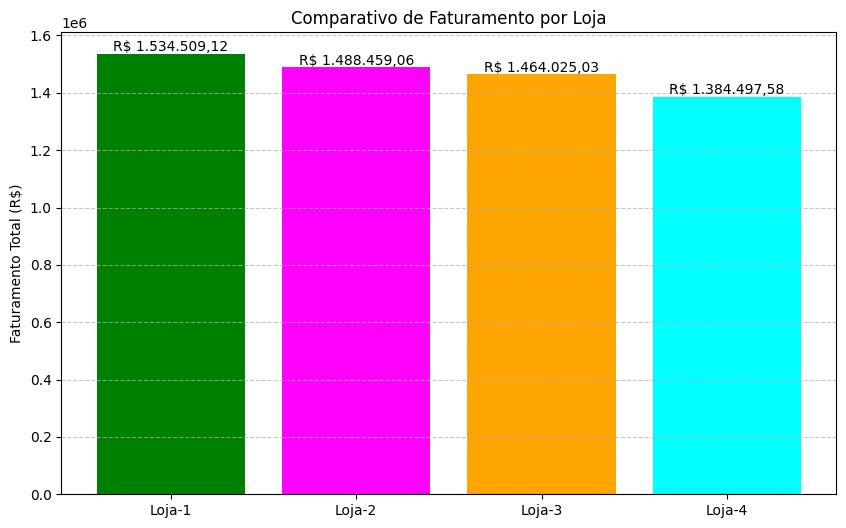

In [140]:
import matplotlib.pyplot as plt

faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
lojas = ['Loja-1', 'Loja-2', 'Loja-3', 'Loja-4']

plt.figure(figsize=(10, 6))
bars = plt.bar(lojas, faturamentos, color=['green', 'magenta', 'orange', 'cyan'])

plt.ylabel('Faturamento Total (R$)')
plt.title('Comparativo de Faturamento por Loja')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'R$ {yval:,.2f}'.replace(',', 'TEMP').replace('.', ',').replace('TEMP', '.'), va='bottom', ha='center')

plt.show()

**Observações sobre o Faturamento Total por Loja:**

A `Loja-1` lidera em faturamento, enquanto a `Loja-4` tem o menor resultado.

###. Análise do Faturamento por Estado das Lojas

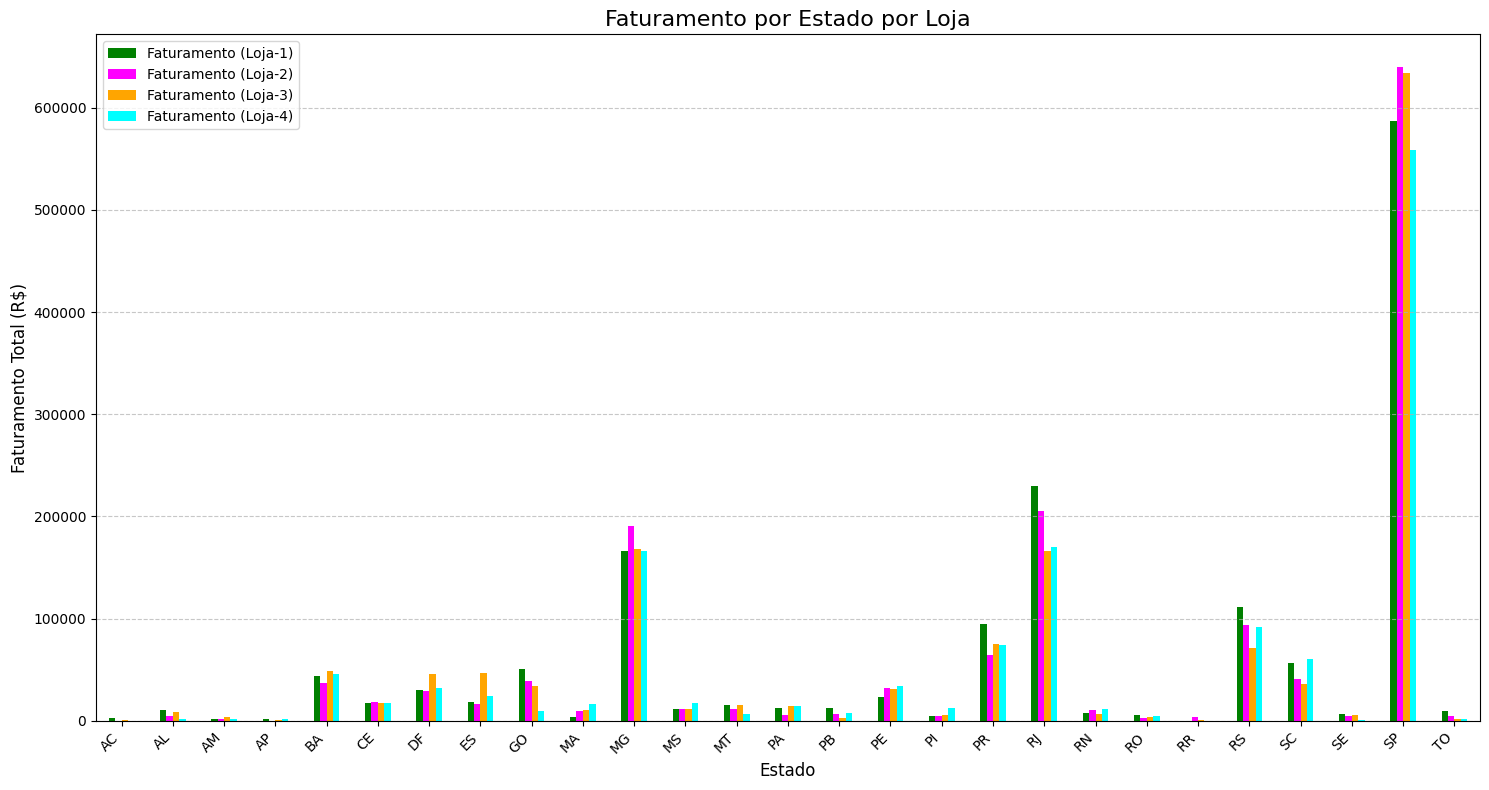

In [141]:
import matplotlib.pyplot as plt

faturamento_por_estado_combinado.plot(x='Local da compra', kind='bar', figsize=(15, 8), color=['green', 'magenta', 'orange', 'cyan'])

plt.title('Faturamento por Estado por Loja', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observações sobre o Faturamento por Estado por Loja:**

O gráfico de barras agrupadas mostra claramente que a região Sudeste, com destaque para São Paulo **(SP)** e Rio de Janeiro **(RJ)**, é responsável pela maior parte do faturamento de todas as lojas.

*   A `Loja-2` tem o maior faturamento em **(SP)**, enquanto a `Loja-1` lidera no **(RJ)**.
*   Outros estados como Minas Gerais **(MG)**, Rio Grande do Sul **(RS)** e Paraná **(PR)** também contribuem significativamente.
*   No geral, o faturamento diminui consideravelmente fora da região Sudeste para todas as lojas.

O gráfico permite comparar diretamente o desempenho de faturamento de cada loja em cada estado, evidenciando a forte concentração de vendas no Sudeste e as variações de desempenho entre as lojas em diferentes localidades.

## 2. Vendas por Categoria por Loja

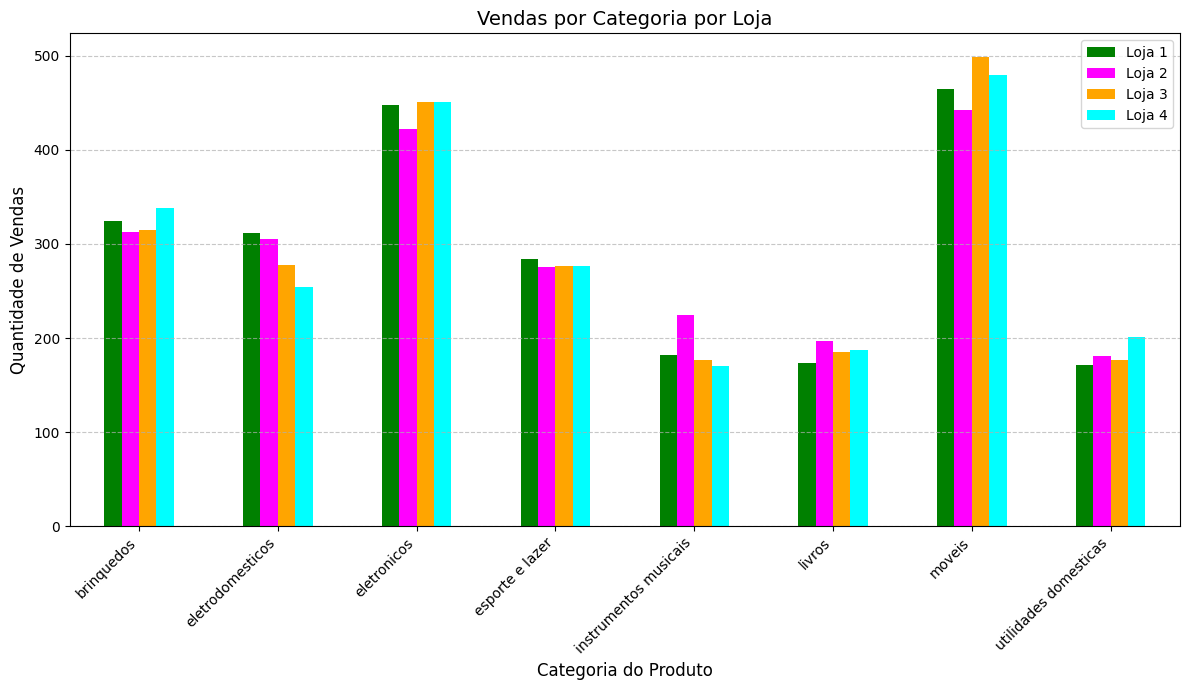

In [142]:
vendas_por_categoria = pd.DataFrame({
    'Loja 1': vendas_por_categoria_loja1,
    'Loja 2': vendas_por_categoria_loja2,
    'Loja 3': vendas_por_categoria_loja3,
    'Loja 4': vendas_por_categoria_loja4
}).fillna(0)

vendas_por_categoria.plot(kind='bar', figsize=(12, 7), color = ['green', 'magenta', 'orange', 'cyan'])
plt.title('Vendas por Categoria por Loja', fontsize=14)
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observações sobre Vendas por Categoria por Loja:**

O gráfico compara as vendas por categoria de produto em cada loja.

*   "**Móveis**" e "**eletrônicos**" são as categorias mais vendidas em todas as lojas.
*   "**Brinquedos**" e "**eletrodomésticos**" também têm bom volume de vendas.
*   "**Instrumentos musicais**", "**livros**" e "**utilidades domésticas**" vendem menos em comparação.
*   A distribuição geral de vendas por categoria é similar entre as lojas.

## 3. Média de Avaliação das Lojas


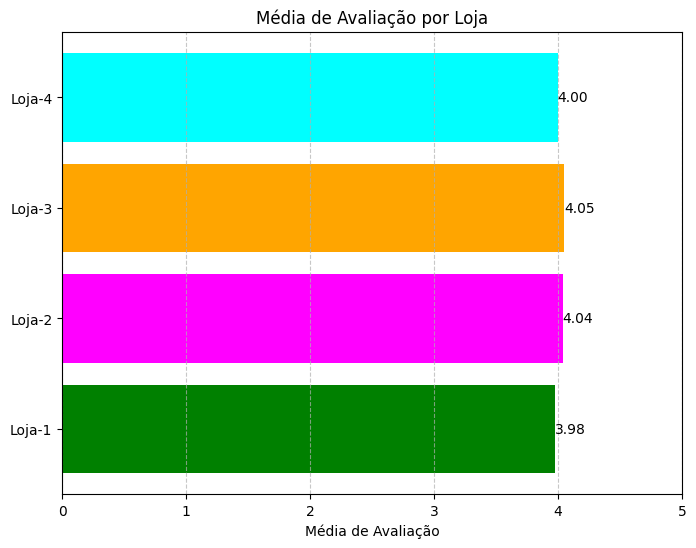

In [143]:
import matplotlib.pyplot as plt

medias_avaliacao = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]
lojas = ['Loja-1', 'Loja-2', 'Loja-3', 'Loja-4']

plt.figure(figsize=(8, 6))
bars = plt.barh(lojas, medias_avaliacao, color=['green', 'magenta', 'orange', 'cyan'])

plt.xlabel('Média de Avaliação')
plt.title('Média de Avaliação por Loja')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2.0, f'{xval:.2f}', va='center', ha='left')


plt.show()

**Observações sobre Média de Avaliação por Loja:**

O gráfico mostra que todas as lojas possuem uma média de avaliação próxima a 4, indicando um bom desempenho geral na satisfação dos clientes.

Lembrando que a média de avaliação das lojas está em uma escala de 1 a 5, onde 1 é a menor avaliação e 5 é a maior.

A `Loja-3` apresenta a maior média, seguida pela `Loja-2`, `Loja-4` e `Loja-1`.



### . Média de Avaliação por Estado das Lojas

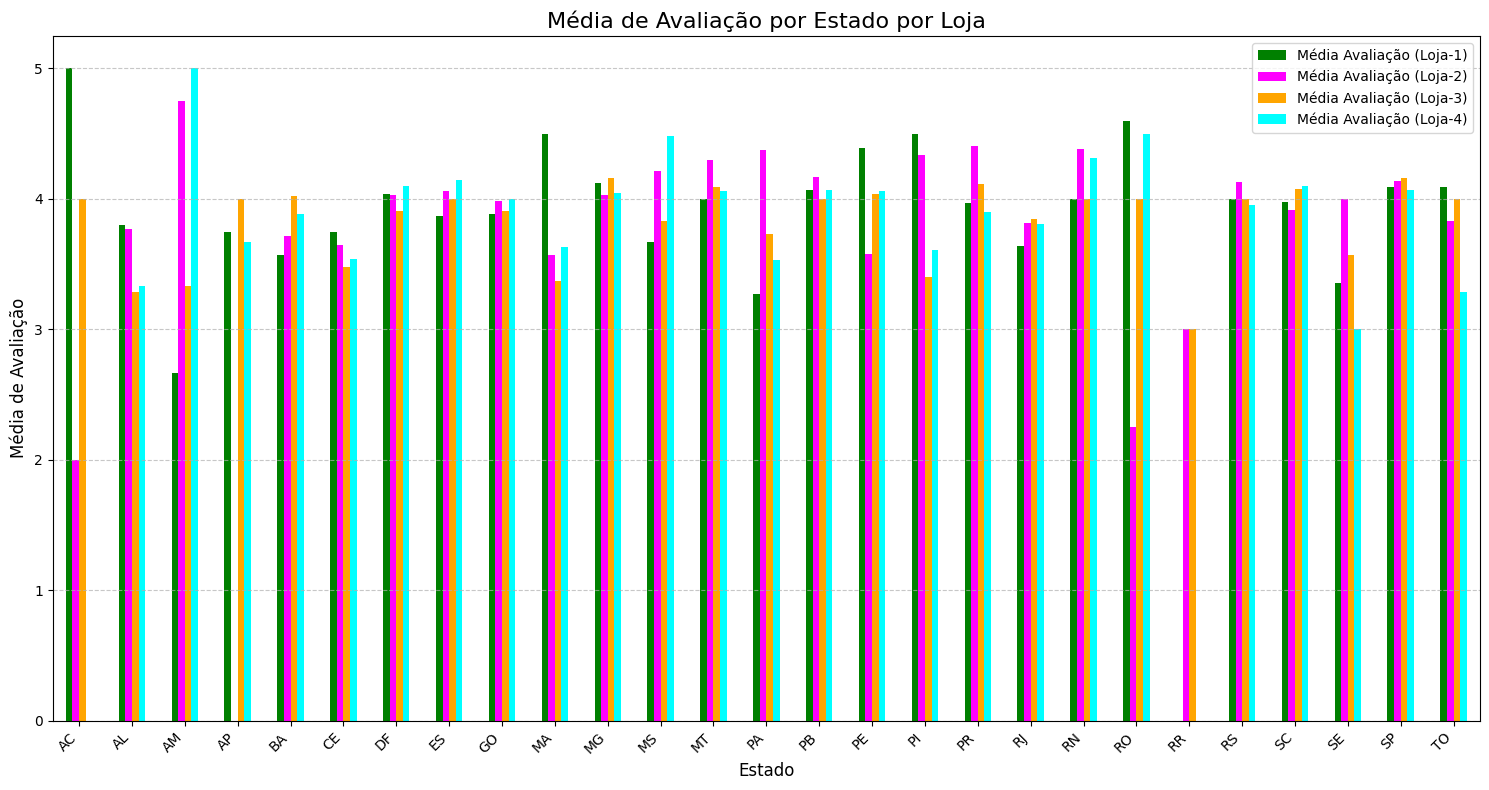

In [144]:
import matplotlib.pyplot as plt

media_avaliacao_estado_combinada.plot(x='Local da compra', kind='bar', figsize=(15, 8), color=['green', 'magenta', 'orange', 'cyan'])

plt.title('Média de Avaliação por Estado por Loja', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Média de Avaliação', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observações sobre a Média de Avaliação por Estado por Loja:**

O gráfico mostra que, em geral, todas as lojas mantêm uma média de avaliação alta (próxima a 4) na maioria dos estados onde atuam, indicando boa satisfação do cliente.

*   Há variações nas médias de avaliação entre os estados e entre as lojas, sugerindo que a satisfação do cliente pode ser influenciada por fatores locais ou específicos de cada loja em determinada região.
*   Alguns estados na região Sudeste (como **SP** e **MG**) e em outras regiões apresentam consistentemente médias de avaliação altas para várias lojas.
*   A análise deste gráfico, em conjunto com o de faturamento, pode ajudar a identificar se há uma correlação entre alto volume de vendas e alta satisfação do cliente em determinadas regiões.

## 4. Produtos Mais e Menos Vendidos

### . Top 10 Produtos Mais Vendidos

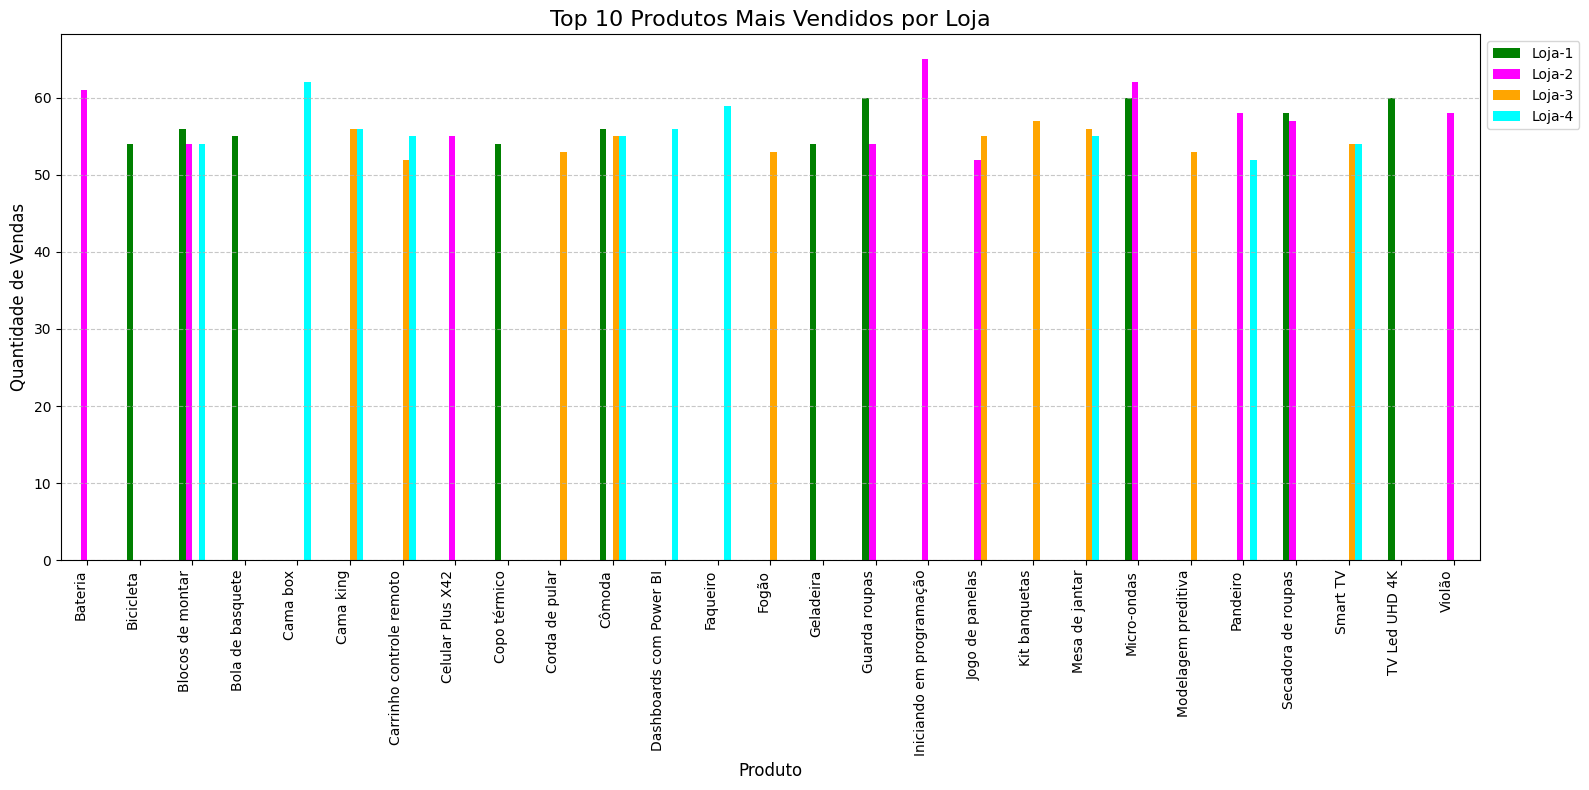

In [145]:
top_produtos_todas_lojas = pd.DataFrame({
    'Loja-1': vendas_por_produto_loja1.head(10),
    'Loja-2': vendas_por_produto_loja2.head(10),
    'Loja-3': vendas_por_produto_loja3.head(10),
    'Loja-4': vendas_por_produto_loja4.head(10)
}).fillna(0)


top_produtos_todas_lojas.plot(kind='bar', figsize=(15, 8), color=['green', 'magenta', 'orange', 'cyan'])
plt.title('Top 10 Produtos Mais Vendidos por Loja', fontsize=16)
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Observações sobre o Gráfico de Top 10 Produtos Mais Vendidos por Loja:**

O gráfico acima exibe os 10 produtos mais vendidos em cada uma das quatro lojas. Podemos observar que:

*   Há uma variedade de produtos entre os mais vendidos em cada loja.
*   Alguns produtos aparecem no Top 10 de mais de uma loja, indicando popularidade geral.
*   As quantidades de vendas dos produtos no Top 10 variam entre as lojas.

### . Top 10 Produtos Menos Vendidos

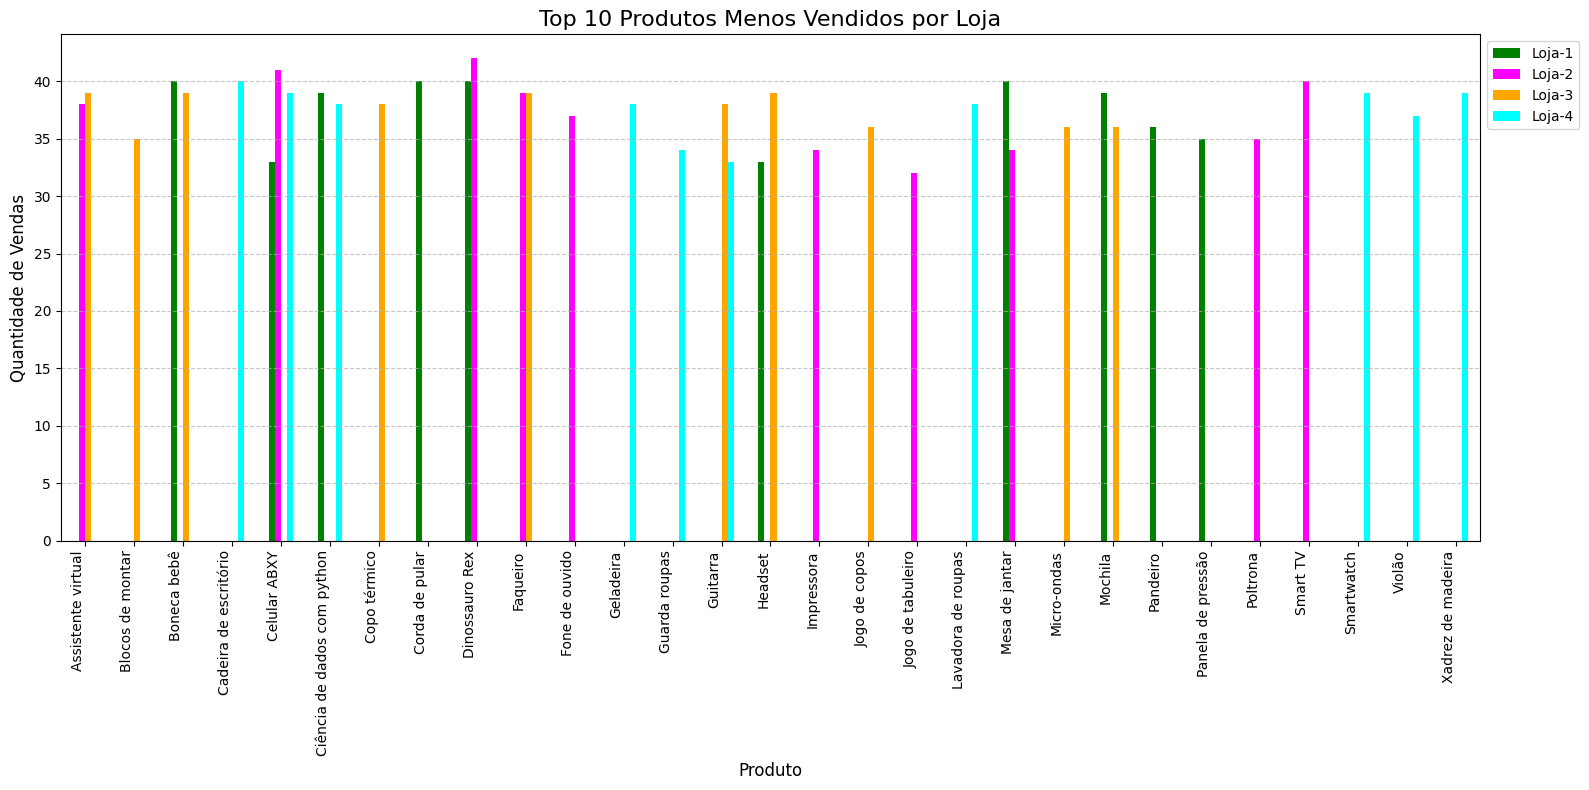

In [146]:
bottom_produtos_todas_lojas = pd.DataFrame({
    'Loja-1': vendas_por_produto_loja1.tail(10),
    'Loja-2': vendas_por_produto_loja2.tail(10),
    'Loja-3': vendas_por_produto_loja3.tail(10),
    'Loja-4': vendas_por_produto_loja4.tail(10)
}).fillna(0)


bottom_produtos_todas_lojas.plot(kind='bar', figsize=(15, 8), color=['green', 'magenta', 'orange', 'cyan'])
plt.title('Top 10 Produtos Menos Vendidos por Loja', fontsize=16)
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Observações sobre o Gráfico de Top 10 Produtos Menos Vendidos por Loja:**

O gráfico acima exibe os 10 produtos menos vendidos em cada uma das quatro lojas. Podemos observar que:

*   Assim como nos mais vendidos, há uma variedade de produtos entre os menos vendidos em cada loja.
*   Alguns produtos aparecem na lista dos 10 menos vendidos de mais de uma loja.
*   As quantidades de vendas dos produtos menos vendidos também variam entre as lojas.

## 5. Frete Médio por Loja

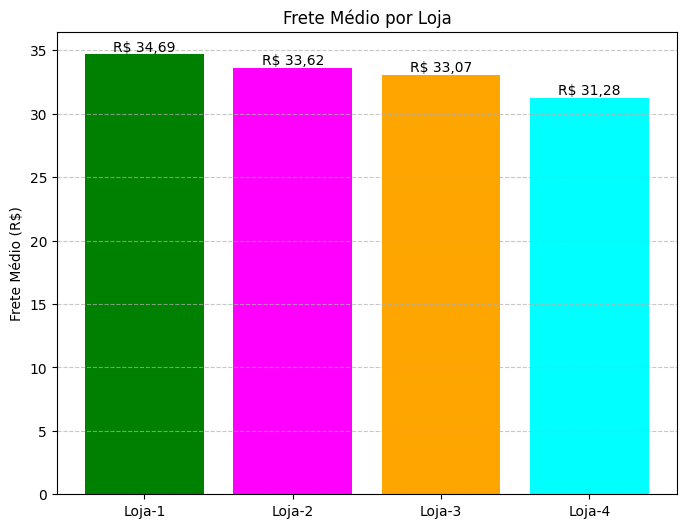

In [147]:
import matplotlib.pyplot as plt
import numpy as np

fretes_medios = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
lojas = ['Loja-1', 'Loja-2', 'Loja-3', 'Loja-4']

plt.figure(figsize=(8, 6))
bars = plt.bar(lojas, fretes_medios, color=['green', 'magenta', 'orange', 'cyan'])

plt.ylabel('Frete Médio (R$)')
plt.title('Frete Médio por Loja')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'R$ {yval:,.2f}'.replace(',', 'TEMP').replace('.', ',').replace('TEMP', '.'), va='bottom', ha='center')

plt.show()

**Observações sobre o Frete Médio por Loja:**

O gráfico acima mostra o frete médio para cada loja. Observamos que os valores de frete médio são relativamente próximos entre as lojas, variando de aproximadamente R\$ 31,00 a R\$ 35,00.   
A `Loja-4` apresenta o menor frete médio, enquanto a `Loja-1` tem o maior. Essa pequena variação sugere que o custo de frete não é um fator de grande diferenciação entre as lojas.

# Relatório Final

Este relatório apresenta uma análise simplificada do desempenho das Lojas 1, 2, 3 e 4, com foco em entender como a localização geográfica pode influenciar os resultados.

**Pontos Chave da Análise:**

*   **Faturamento:** A **Loja 1** gerou o maior faturamento total, seguida pela Loja 2, Loja 3 e, por último, a **Loja 4** com o menor faturamento.
*   **Onde as Vendas Acontecem:** Todas as lojas vendem principalmente na região Sudeste do Brasil, com forte concentração no estado de São Paulo (SP) e Rio de Janeiro (RJ). A Loja 2 se destaca em SP e a Loja 1 no RJ em termos de faturamento nesses estados.
*   **Satisfação do Cliente:** A média de avaliação dos clientes é alta para todas as lojas (próxima a 4 em uma escala de 1 a 5), indicando que, no geral, os clientes estão satisfeitos. A Loja 3 e a Loja 2 tiveram as médias de avaliação mais altas.
*   **Produtos Vendidos:** As categorias de produtos mais populares em todas as lojas são "móveis" e "eletrônicos".

**Por que a Loja 4 é Considerada a Menos Eficiente (com base nestes dados):**

Com base nos dados de vendas analisados, a Loja 4 se destaca por ter o **menor faturamento total**. Apesar de vender produtos similares e operar nas mesmas regiões geográficas principais que as outras lojas, e de ter uma média de avaliação razoável, o volume de vendas da Loja 4 é consistentemente menor.

Isso sugere que, em comparação com as outras lojas, a Loja 4 está gerando menos receita a partir de sua área de atuação e sortimento de produtos. É importante notar que esta conclusão se baseia nos dados de vendas e avaliação disponíveis; outros fatores como custos operacionais, estratégias de marketing ou concorrência local mais intensa podem influenciar a eficiência geral de uma loja, mas não foram analisados aqui.

**Conclusão Simplificada:**

As Lojas 1, 2 e 3 demonstram um desempenho de vendas mais forte, aproveitando bem a concentração de mercado no Sudeste. A Loja 4, embora com clientes geralmente satisfeitos, precisa aumentar seu volume de vendas para se igualar às outras lojas com base nos dados de faturamento. A localização geográfica no Sudeste é importante para o sucesso de todas as lojas, mas o desempenho varia entre elas, indicando que outros fatores internos ou de mercado também desempenham um papel crucial.

Lembre-se que são sugestões para aprimorar a clareza e a comunicação, não necessariamente "erros":

1. Introdução às Análises por Loja: No início da análise de cada loja (por exemplo, na seção "Análise de Dados - (Loja-1)"), você poderia adicionar uma frase ou duas explicando brevemente por que você está começando a análise por essa loja específica (se houver um motivo, como ser a que teve maior faturamento) ou simplesmente reiterar que a análise individual é o primeiro passo para entender cada unidade antes de compará-las.
2. Justificativa para Passos de Limpeza/Verificação: Em seções como "Verificação de Valores Faltantes", "Tipos de Dados Incorretos", "Verificação de Valores Duplicados" e "Valores Atípicos ou Valores Irreais", você já faz um ótimo trabalho em apresentar os resultados. Para maior clareza para não-analistas, você pode adicionar uma breve frase explicando por que cada uma dessas verificações é importante. Por exemplo, para valores faltantes: "Verificamos valores faltantes para garantir que nossos cálculos e análises sejam precisos e não sejam afetados por dados incompletos."
3. Observações dos Gráficos: Você já simplificou as observações dos gráficos de faturamento e avaliação por estado, o que é ótimo. Revise as observações de outros gráficos (como os box plots ou os gráficos de top/bottom produtos) para garantir que a linguagem seja o mais direta possível, explicando o que cada gráfico mostra e qual insight principal ele oferece. Evite jargões técnicos sempre que possível.
4. Transições entre Seções: Use as células de Markdown para criar transições suaves entre as diferentes partes da sua análise. Por exemplo, antes de passar da análise individual das lojas para a combinação e comparação, uma célula explicando que "Agora que analisamos cada loja individualmente, vamos combinar os dados para comparar o desempenho entre elas" pode ajudar.
Conclusão sobre o Frete Zero: Na seção onde você analisa os registros com frete zero, você identificou padrões interessantes. No relatório final ou na conclusão, você pode mencionar brevemente a relevância dessa descoberta – por que é importante saber quais categorias ou regiões têm frete zero? (Ex: pode indicar promoções, parcerias, etc.).